# DSM150 CW2 - Submission

Ming Kai Toh
<br>Student Number: 220645401

## Libraries

In [1]:
# Data Science Libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
import time
import json

# TensorFlow & Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers, Model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
import tensorflow_recommenders as tfrs

# NLP Libraries
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import AutoTokenizer, AutoModel
import torch

C:\Users\mktoh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 3.1 Datasets

### Loading Datasets

In [2]:
# Load Dataset
review_df = pd.read_json('Amazon_Fashion.jsonl', lines=True)
review_df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,Pretty locket,I think this locket is really pretty. The insi...,[],B00LOPVX74,B00LOPVX74,AGBFYI2DDIKXC5Y4FARTYDTQBMFQ,2020-01-09 00:06:34.489,3,True
1,5,A,Great,[],B07B4JXK8D,B07B4JXK8D,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2020-12-20 01:04:06.701,0,True
2,2,Two Stars,One of the stones fell out within the first 2 ...,[],B007ZSEQ4Q,B007ZSEQ4Q,AHITBJSS7KYUBVZPX7M2WJCOIVKQ,2015-05-23 01:33:48.000,3,True
3,1,Won’t buy again,Crappy socks. Money wasted. Bought to wear wit...,[],B07F2BTFS9,B07F2BTFS9,AFVNEEPDEIH5SPUN5BWC6NKL3WNQ,2018-12-31 20:57:27.095,2,True
4,5,I LOVE these glasses,I LOVE these glasses! They fit perfectly over...,[],B00PKRFU4O,B00XESJTDE,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,2015-08-13 14:29:26.000,0,True


In [3]:
meta = pd.read_json('meta_Amazon_Fashion.jsonl', lines=True)
meta.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together
0,AMAZON FASHION,YUEDGE 5 Pairs Men's Moisture Control Cushione...,4.6,16,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],GiveGift,[],{'Package Dimensions': '10.31 x 8.5 x 1.73 inc...,B08BHN9PK5,NaN
1,AMAZON FASHION,DouBCQ Women's Palazzo Lounge Wide Leg Casual ...,4.1,7,"[Drawstring closure, Machine Wash]",[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],DouBCQ,[],{'Package Dimensions': '15 x 10.2 x 0.4 inches...,B08R39MRDW,NaN
2,AMAZON FASHION,Pastel by Vivienne Honey Vanilla Girls' Trapez...,4.3,11,"[Zipper closure, Hand Wash Only]",[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Pastel by Vivienne,[],"{'Is Discontinued By Manufacturer': 'No', 'Pac...",B077KJHCJ4,NaN
3,AMAZON FASHION,Mento Streamtail,2.0,1,"[Thermoplastic Rubber sole, High Density Premi...",[Slip on the Women's Mento and you're ready to...,29.81,[{'thumb': 'https://m.media-amazon.com/images/...,[],Guy Harvey,[],{'Package Dimensions': '11.22 x 4.72 x 4.33 in...,B0811M2JG9,NaN
4,AMAZON FASHION,RONNOX Women's 3-Pairs Bright Colored Calf Com...,4.3,3032,"[Pull On closure, Size Guide: ""S"" fits calf 10...",[Ronnox Calf Sleeves - Allowing Your Body to P...,17.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'HONEST Review: RONNOX Women's 3-Pa...,RONNOX,[],"{'Is Discontinued By Manufacturer': 'No', 'Pac...",B07SB2892S,NaN


### 3.1.1 Data Cleaning and Preperation

#### 3.1.1.1 Review Data

##### Missing Value Check

In [4]:
# Missing Value Check
nan_count = review_df.isna().sum()  # Count of NaNs
nan_percentage = review_df.isna().mean() * 100  # Percentage of NaNs

# Combine count and percentage into a DataFrame
nan_distribution = pd.DataFrame({'NaN Count': nan_count, 'NaN Percentage': nan_percentage})

print(nan_distribution)

                   NaN Count  NaN Percentage
rating                     0             0.0
title                      0             0.0
text                       0             0.0
images                     0             0.0
asin                       0             0.0
parent_asin                0             0.0
user_id                    0             0.0
timestamp                  0             0.0
helpful_vote               0             0.0
verified_purchase          0             0.0


##### Empty Images

In [5]:
# Missing Value Check
# Count the number of rows where the length of 'images' is 0 (empty)
empty_images_count = review_df['images'].apply(lambda x: len(x) == 0).value_counts()

# Count the number of rows where the length of 'images' is not 0 (non-empty)
non_empty_images_count = review_df['images'].apply(lambda x: len(x) != 0).value_counts()

# Combine the counts into a DataFrame
image_summary = pd.DataFrame({
    'Count': empty_images_count,
    'Percentage (%)': empty_images_count / len(review_df) * 100
}).rename(index={True: 'Empty', False: 'Non-Empty'})

# Print the summary
print(image_summary)

             Count  Percentage (%)
images                            
Empty      2340835       93.598244
Non-Empty   160104        6.401756


##### Verified Purchase Filtering

In [6]:
# Verified Purchase Filtering
# Get the count of 'verified_purchase' values
ver_counts = review_df['verified_purchase'].value_counts()

# Get the percentage of 'verified_purchase' values
ver_percentage = review_df['verified_purchase'].value_counts(normalize=True).mul(100).round(2)

# Combine the count and percentage into a single DataFrame for nicer output
summary = pd.DataFrame({
    'Count': ver_counts,
    'Percentage (%)': ver_percentage
})



print(summary)

                     Count  Percentage (%)
verified_purchase                         
True               2337702           93.47
False               163237            6.53


In [7]:
# Filter to verfied purchases
review_df = review_df[review_df['verified_purchase']]

##### Review Combination

In [8]:
# Combine title and text
review_df['review'] = review_df['title'] + " - " + review_df['text']

##### Weighted Rating Calculation

In [9]:
# Check the distribution of ratings and helpfulness votes
print(review_df['rating'].describe())
print(review_df['helpful_vote'].describe())

count    2.337702e+06
mean     3.970322e+00
std      1.429096e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64
count    2.337702e+06
mean     5.649510e-01
std      3.670109e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.140000e+02
Name: helpful_vote, dtype: float64


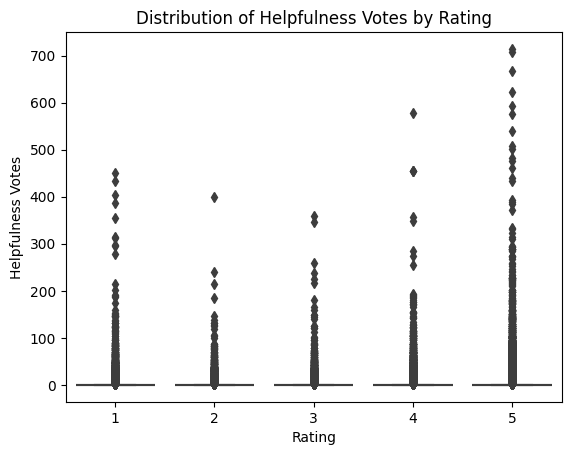

In [10]:
sns.boxplot(x='rating', y='helpful_vote', data=review_df)
plt.title("Distribution of Helpfulness Votes by Rating")
plt.xlabel("Rating")
plt.ylabel("Helpfulness Votes")
plt.show()

In [11]:

# Inverse normalization for ranking 1 and 2 (less helpful votes get more weight)
review_df['scaled_log_helpful_vote'] = np.log1p(np.where(
    review_df['rating'] <= 2, 1 / (review_df['helpful_vote'] + 1), review_df['helpful_vote'] +1
))

review_df['weighted_rating'] = review_df['rating'] * review_df['scaled_log_helpful_vote']

review_df[['rating', 'helpful_vote', 'scaled_log_helpful_vote', 'weighted_rating']].head(10)

,rating,helpful_vote,scaled_log_helpful_vote,weighted_rating
0,5,3,1.609438,8.047190
1,5,0,0.693147,3.465736
2,2,3,0.223144,0.446287
3,1,2,0.287682,0.287682
4,5,0,0.693147,3.465736
5,3,0,0.693147,2.079442
6,5,0,0.693147,3.465736
7,4,0,0.693147,2.772589
8,5,0,0.693147,3.465736
9,2,0,0.693147,1.386294


In [12]:

# Drop not used Columns
review_df = review_df.drop(columns = ['images', 'verified_purchase','asin'])


In [13]:
review_df.dtypes

rating                              int64
title                              object
text                               object
parent_asin                        object
user_id                            object
timestamp                  datetime64[ns]
helpful_vote                        int64
review                             object
scaled_log_helpful_vote           float64
weighted_rating                   float64
dtype: object

In [14]:
review_df['parent_asin'] = review_df['parent_asin'].astype('string')
review_df['user_id'] = review_df['user_id'].astype('string')
review_df['timestamp'] = pd.to_datetime(review_df['timestamp'])
review_df['review'] = review_df['review'].astype('string')
review_df['title'] = review_df['title'].astype('string')
review_df['text'] = review_df['text'].astype('string')

In [15]:
review_df.dtypes

rating                              int64
title                      string[python]
text                       string[python]
parent_asin                string[python]
user_id                    string[python]
timestamp                  datetime64[ns]
helpful_vote                        int64
review                     string[python]
scaled_log_helpful_vote           float64
weighted_rating                   float64
dtype: object

In [16]:
# Filter reviews to include only those for items that exist in the items dataset
reviews = review_df[review_df['parent_asin'].isin(meta['parent_asin'])]

# Reduce number of rows
reviews = reviews[reviews['timestamp'].dt.year >= 2022]
reviews.head()

,rating,title,text,parent_asin,user_id,timestamp,helpful_vote,review,scaled_log_helpful_vote,weighted_rating
8,5,Bright and summer,What a cute top! Cam wait to wear in warm weat...,B087M39LVV,AEQAYV7RXZEBXMQIQPL6KCT2CFWQ,2022-01-20 23:38:14.143,0,Bright and summer - What a cute top! Cam wait ...,0.693147,3.465736
11,5,My Kid loves these!,My son is a big Ninjago fan and these are perf...,B091GMMYPS,AEVPPTMG43C6GWSR7I2UGRQN7WFQ,2022-02-04 18:48:28.824,0,My Kid loves these! - My son is a big Ninjago ...,0.693147,3.465736
17,5,Cute,Cutest charms for my Easter bracelets.,B09QH7GPH1,AH6CATODIVPVUOJEWHRSRCSKAOHA,2022-09-10 14:56:49.743,0,Cute - Cutest charms for my Easter bracelets.,0.693147,3.465736
48,2,elastic adjustable bands for charge 4,"Well. I really like the idea, however, they a...",B098NYMTYH,AFZUK3MTBIBEDQOPAK3OATUOUKLA,2022-08-29 21:33:00.730,0,elastic adjustable bands for charge 4 - Well. ...,0.693147,1.386294
49,2,open shoulder t shirt,"I am 5'7"".. usually wear a 14/16 or 0x/1x.. 38...",B095CHR38Z,AFZUK3MTBIBEDQOPAK3OATUOUKLA,2022-02-17 01:41:15.013,2,"open shoulder t shirt - I am 5'7"".. usually we...",0.287682,0.575364


#### 3.1.1.2 Meta Data

##### Image Avalability Check

In [17]:
# Function to check if a single cell contains 'MAIN' variant and 'large' key
def has_main_and_large(images):
    has_main = any(img.get('variant') == 'MAIN' for img in images)
    has_large = any('large' in img for img in images)
    return has_main and has_large

# Apply the function to the entire column
meta['has_main_and_large'] = meta['images'].apply(has_main_and_large)

# Count how many rows meet the criteria
count_main_and_large = meta['has_main_and_large'].sum()

# Total number of rows
total_rows = len(meta)

# Calculate the percentage of rows with and without the 'MAIN' variant and 'large' key
percentage_with = (count_main_and_large / total_rows) * 100
percentage_without = 100 - percentage_with

# Output the percentages
print(f"Percentage of rows with 'MAIN' variant and 'large' key: {percentage_with:.2f}%")
print(f"Percentage of rows without 'MAIN' variant and 'large' key: {percentage_without:.2f}%")

Percentage of rows with 'MAIN' variant and 'large' key: 99.58%
Percentage of rows without 'MAIN' variant and 'large' key: 0.42%


##### Image Preprocessing and Batch Processing

In [18]:
# Function to extract the 'large' image link if it exists
def get_large_image_link(images):
    for img in images:
        if 'variant' in img and img['variant'] == 'MAIN' and 'large' in img:
            return img['large']
    return None  # Return None if no 'large' image is found

# Apply the function to extract the 'large' image link and filter rows
meta_filtered = meta[meta['images'].apply(get_large_image_link).notnull()]

# Add the 'large_image_link' column
meta_filtered['large_image_link'] = meta_filtered['images'].apply(get_large_image_link)

# Output the filtered DataFrame with the new 'large_image_link' column
meta_filtered[['large_image_link']].head()

C:\Users\mktoh\AppData\Local\Temp\ipykernel_22320\2496615620.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_filtered['large_image_link'] = meta_filtered['images'].apply(get_large_image_link)


,large_image_link
0,https://m.media-amazon.com/images/I/41+cCfaVOF...
1,https://m.media-amazon.com/images/I/515cR-ta1E...
2,https://m.media-amazon.com/images/I/31GwmwNCdA...
3,https://m.media-amazon.com/images/I/31P-uHUUIX...
4,https://m.media-amazon.com/images/I/51CqMDJOOD...


In [19]:
# Items with interactions in the filtered reviews
interacted_items = meta_filtered[meta_filtered['parent_asin'].isin(reviews['parent_asin'])]

# Items with NO interactions in the filtered reviews
non_interacted_items = meta_filtered[~meta_filtered['parent_asin'].isin(reviews['parent_asin'])]

# Sample 25% of the interacted items from the non-interacted items
num_samples = int(len(interacted_items) * 0.25)
sampled_non_interacted_items = non_interacted_items.sample(n=num_samples, random_state=42)  # Set random_state for reproducibility

# Combine interacted items with the sampled non-interacted items
item_meta = pd.concat([interacted_items, sampled_non_interacted_items])
item_meta.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,has_main_and_large,large_image_link
4,AMAZON FASHION,RONNOX Women's 3-Pairs Bright Colored Calf Com...,4.3,3032,"[Pull On closure, Size Guide: ""S"" fits calf 10...",[Ronnox Calf Sleeves - Allowing Your Body to P...,17.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'HONEST Review: RONNOX Women's 3-Pa...,RONNOX,[],"{'Is Discontinued By Manufacturer': 'No', 'Pac...",B07SB2892S,NaN,True,https://m.media-amazon.com/images/I/51CqMDJOOD...
7,AMAZON FASHION,YUNXI 3D grape Drop Earrings Cute Fruit Gold D...,4.7,13,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Cubic Zirconia Pearl Drop Earrings...,YUNXI,[],{'Package Dimensions': '4.13 x 3.03 x 0.47 inc...,B08T6KT3N8,NaN,True,https://m.media-amazon.com/images/I/41t0Fv--wP...
8,AMAZON FASHION,LYCKYY Women's Tie Dye Sweatshirt Crewneck Lon...,3.7,52,[Pull On closure],[Tie dye shirts for Women long sleeve crewneck...,9.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],LYCKYY,[],"{'Department': 'womens', 'Date First Available...",B08FMLXY1Z,NaN,True,https://m.media-amazon.com/images/I/41DW4uwWLQ...
14,AMAZON FASHION,BUSCBEAR Women's Plus Size Push Up Bras Underw...,2.9,3,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Women's Underwire Push Up Bras ', ...",BUSCBEAR,[],{'Product Dimensions': '23.62 x 15.74 x 9.84 i...,B09JWFFCF9,NaN,True,https://m.media-amazon.com/images/I/41fVaN6Ret...
16,AMAZON FASHION,emoji Boys' Sun & Palm Trees Swim Shorts Black...,4.7,43,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],emoji,[],"{'Is Discontinued By Manufacturer': 'No', 'Pac...",B079TR86T5,NaN,True,https://m.media-amazon.com/images/I/51p34KxSNW...


In [20]:
# Function to download, resize, and add padding to the image
def download_and_get_array(image_url, target_size=(64, 64), max_retries=3, retry_delay=2):
    retries = 0

    while retries < max_retries:
        try:
            # Download the image
            response = requests.get(image_url, timeout=10)

            # If 404 error (Not Found), skip the image and return None
            if response.status_code == 404:
                print(f"404 Error: {image_url} not found. Returning black image.")
                return np.zeros((target_size[0], target_size[1], 3), dtype=np.uint8)

            # Raise error for any other bad responses (e.g., 500, 403)
            response.raise_for_status()

            # Process the image if the request is successful
            img = Image.open(BytesIO(response.content))

            # Resize the image while maintaining the aspect ratio
            width, height = img.size
            aspect_ratio = width / height

            if aspect_ratio > 1:
                new_width = target_size[0]
                new_height = int(target_size[0] / aspect_ratio)
            else:
                new_height = target_size[1]
                new_width = int(target_size[1] * aspect_ratio)

            img_resized = img.resize((new_width, new_height))

            # Add padding (border) to make the image fit the target size
            new_img = Image.new("RGB", target_size, (0, 0, 0))  # Black padding
            new_img.paste(img_resized, ((target_size[0] - new_width) // 2, (target_size[1] - new_height) // 2))

            # Convert the image to a NumPy array
            img_array = np.array(new_img)
            return img_array

        except requests.exceptions.Timeout:
            # Handle timeout error by retrying
            print(f"Timeout occurred while processing {image_url}. Retrying ({retries + 1}/{max_retries})...")
            retries += 1
            time.sleep(retry_delay)  # Wait before retrying
        except requests.exceptions.RequestException as e:
            # Catch other request-related exceptions (e.g., connection errors, 403, 500)
            print(f"Error processing {image_url}: {e}")
            # Return a placeholder array (black image) of the same size for other errors
            return np.zeros((target_size[0], target_size[1], 3), dtype=np.uint8)

# Function to process images in parallel for a single batch
def process_images_batch(meta_df, target_size=(64, 64), max_workers=16):
    # Initialize a progress bar for images within the batch
    image_arrays = []
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        for img_array in tqdm(
            executor.map(lambda url: download_and_get_array(url, target_size), meta_df['large_image_link']),
            total=len(meta_df),
            desc="Processing Images in Batch",
            unit="image",
            ncols=100
        ):
            if img_array is not None:
                image_arrays.append(img_array)
    return image_arrays

# Function to process the dataset in batches and save as .npz
def process_in_batches(meta_df, batch_size=10000, target_size=(64, 64), max_workers=16, npz_file="images_data.npz"):
    # Initialize the first batch processing
    all_images = []

    # Start tracking the overall runtime
    start_time = time.time()

    # Calculate the number of batches
    num_batches = len(meta_df) // batch_size + (1 if len(meta_df) % batch_size != 0 else 0)

    # Loop through each batch
    for batch_num in range(num_batches):
        # Get the current batch
        batch_start = batch_num * batch_size
        batch_end = min((batch_num + 1) * batch_size, len(meta_df))
        batch = meta_df.iloc[batch_start:batch_end]

        # Process the batch and get image arrays with a progress bar for the images in the batch
        image_arrays = process_images_batch(batch, target_size=target_size, max_workers=max_workers)

        # Append the image arrays to the list
        all_images.extend(image_arrays)

        # Save the current batch to the .npz file (append mode)
        np.savez_compressed(npz_file, images=np.array(all_images))

        # Print a message after each batch is processed
        print(f"Batch {batch_num + 1}/{num_batches} completed.")

        # Clear cache (optional, depending on your use case)
        del image_arrays

    # Calculate the total time taken
    total_time = time.time() - start_time

    # Print the overall completion message with the total time
    print(f"\nProcessing completed. Results saved to {npz_file}.")
    print(f"Total processing time: {total_time:.2f} seconds.")

In [21]:
#process_in_batches(item_meta, batch_size=10000, target_size=(224, 224), max_workers=16, npz_file="images_data.npz")
#took about 6 hours

In [20]:
processed_images = np.load("images_data_fixed.npz")['images']
item_meta["image"] = list(processed_images)

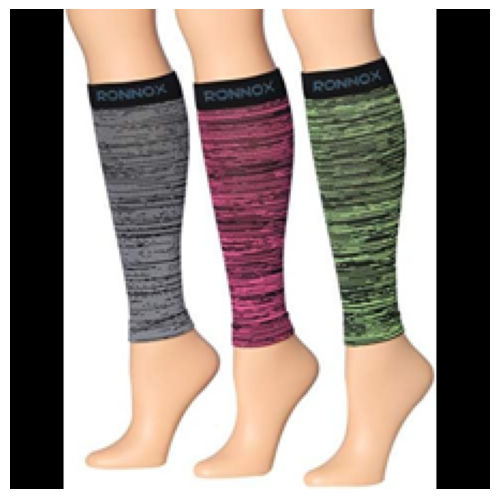

In [22]:
plt.imshow(processed_images[0])  # Display the image
plt.axis("off")  # Hide axis/grid
plt.tight_layout(pad=0)  # Remove white borders
plt.show()

##### Missing Value Handling

In [21]:
# Function to count NaN and empty lists
def count_empty(obj):
    return obj.isna().sum() + obj.apply(lambda x: isinstance(x, list) and len(x) == 0).sum()

# Apply the function to each column
empty_columns = item_meta.apply(count_empty)

# Print the number of empty objects (NaN or empty list) for each column
print(empty_columns)

main_category              0
title                      0
average_rating             0
rating_number              0
features               36953
description            99077
price                  94356
images                     0
videos                 93372
store                   1198
categories            111731
details                    0
parent_asin                0
bought_together       111731
has_main_and_large         0
large_image_link           0
image                      0
dtype: int64


In [23]:
items = item_meta.drop(columns=['main_category','images','videos','has_main_and_large','categories','bought_together'])

In [24]:
items = items.dropna(subset=['image'])  # Drop rows with black images
items['image'] = items['image'].apply(lambda img: img if not np.all(img == 0) else None)  # Filter out black images
items = items.dropna(subset=['image'])  # Drop rows with black images

In [25]:

# Combine text to enrich item description

items['item_description'] = items['title'].fillna('No title available') + ' ' + \
                         items['features'].fillna('No features available').apply(lambda x: ' '.join(x) if isinstance(x, list) else x) + ' ' + \
                         items['description'].fillna('No description available').apply(lambda x: ' '.join(x) if isinstance(x, list) else x) + ' ' + \
                         items['details'].fillna('No details available').apply(lambda x: json.dumps(x) if isinstance(x, dict) else str(x))

items = items.drop(columns=['price'])

In [26]:
items.dtypes

title                object
average_rating      float64
rating_number         int64
features             object
description          object
store                object
details              object
parent_asin          object
large_image_link     object
image                object
item_description     object
dtype: object

In [ ]:
items['rating_number'] = items['rating_number'].astype('int')
items['parent_asin'] = items['parent_asin'].astype('string')
items['item_description'] = items['item_description'].astype('string')
items['features'] = items['features'].astype('string')
items['description'] = items['description'].astype('string')
items['store'] = items['store'].astype('string')
items['details'] = items['details'].astype('string')
items['large_image_link'] = items['large_image_link'].astype('string')
items['title'] = items['title'].astype('string')
items.rename(columns={'features':'product_features','description':'product_description','details':'product_details','title':'product_title'},inplace=True)
items.dtypes



KeyError: 'features'

## 3.2 Feature Extraction and Analysis

### 3.2.1 Textual Analysis

In [45]:
from langdetect import detect, DetectorFactory, LangDetectException
from translatepy import Translator

# Set seed for consistent language detection
DetectorFactory.seed = 0
tqdm.pandas()

# Initialize translator
translator = Translator()

# Language detection
def detect_lang(text):
    try:
        text = str(text).strip()
        if not text:
            return 'unknown'
        return detect(text)
    except LangDetectException:
        return 'unknown'
    except Exception:
        return 'unknown'

# Translation
def translate_to_english(text):
    try:
        text = str(text).strip()
        if not text:
            return text
        return translator.translate(text, "English").result
    except Exception:
        return text

# Detect language in 'review' column
print("Detecting language in 'review' column...")
reviews['review_lang'] = reviews['review'].progress_apply(lambda x: detect_lang(x) if pd.notna(x) else 'unknown')

# Translate non-English or unknown-language reviews
print("Translating non-English/unknown 'review' entries to English...")
mask = reviews['review_lang'].isin(['unknown']) | (reviews['review_lang'] != 'en')
reviews.loc[mask, 'review'] = reviews.loc[mask, 'review'].progress_apply(translate_to_english)

print("'review' column language detection and translation complete.")


Detecting language in 'review' column...


100%|██████████| 183072/183072 [06:08<00:00, 496.64it/s]


Translating non-English/unknown 'review' entries to English...


100%|██████████| 9989/9989 [1:07:19<00:00,  2.47it/s]

'review' column language detection and translation complete.


In [46]:
# Install dependencies if not installed
import open_clip
import re
from tqdm import tqdm

# Load OpenCLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model = open_clip.create_model("ViT-B-32", pretrained="laion2b_s34b_b79k").to(device)
tokenizer = open_clip.get_tokenizer("ViT-B-32")

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Function to extract CLIP text embeddings with progress bar
def batch_process_text_embeddings(texts, batch_size=32):
    texts = [clean_text(text) for text in texts]  # Clean all text before processing
    embeddings = []

    for i in tqdm(range(0, len(texts), batch_size), desc="Processing Text Embeddings"):
        batch_texts = texts[i:i + batch_size]  # Get batch of texts
        tokens = tokenizer(batch_texts).to(device)  # Tokenize
        with torch.no_grad():
            batch_features = model.encode_text(tokens)  # Get embeddings
            batch_features = batch_features / batch_features.norm(dim=-1, keepdim=True)  # L2-Normalization
            batch_features = batch_features.cpu().numpy()  # Convert to NumPy
            embeddings.extend(batch_features)
    return np.array(embeddings)


# Generate CLIP text embeddings with loading bar
print("\nGenerating CLIP embeddings for reviews...")
reviews['review_features'] = list(batch_process_text_embeddings(reviews['review'].tolist()))

print("\nGenerating CLIP embeddings for item descriptions...")
items['item_desc_features'] = list(batch_process_text_embeddings(items['item_description'].tolist()))



Generating CLIP embeddings for reviews...


Processing Text Embeddings: 100%|██████████| 5721/5721 [04:13<00:00, 22.61it/s]



Generating CLIP embeddings for item descriptions...


Processing Text Embeddings: 100%|██████████| 3491/3491 [02:49<00:00, 20.60it/s]


In [47]:
import spacy
import pandas as pd
from tqdm import tqdm

# Load spaCy model (Make sure it's installed)
nlp = spacy.load('en_core_web_lg', disable=["parser"])  # Disable unused components for speed

# Function to dynamically extract colors and materials
def extract_colors_and_materials(doc):
    colors = []
    materials = []

    for token in doc:
        if token.dep_ in ["amod", "compound"]:  # Adjective modifier or compound word
            if token.ent_type_ == "COLOR":  # Detect colors
                colors.append(token.text)
            elif token.ent_type_ == "MATERIAL":  # Detect materials
                materials.append(token.text)

    return list(set(colors)), list(set(materials))
# Function to extract named entities & adjectives in batches
def batch_extract_entities_and_adjectives(texts, batch_size=64):
    results = []

    # Use `tqdm` to show progress while processing in batches
    for doc in tqdm(nlp.pipe(texts, batch_size=batch_size), total=len(texts), desc="Processing NER in Batches"):
        entities = [ent.text for ent in doc.ents]  # Named entities
        adjectives = [token.text for token in doc if token.pos_ == "ADJ"]  # Adjectives
        nouns = [token.text for token in doc if token.pos_ == "NOUN"]  # Common nouns
        proper_nouns = [token.text for token in doc if token.pos_ == "PROPN"]  # Proper nouns (brand names, places)
        colors, materials = extract_colors_and_materials(doc)  # Detect colors & materials dynamically
        results.append(list(set(entities + adjectives + nouns + proper_nouns + colors + materials)))  # Store combined result

    return results

# Apply batch processing to extract keywords
print("\nExtracting keywords from reviews...")
reviews['keywords'] = batch_extract_entities_and_adjectives(reviews['review'].tolist(), batch_size=64)

print("\nExtracting keywords from item descriptions...")
items['keywords'] = batch_extract_entities_and_adjectives(items['item_description'].tolist(), batch_size=64)

# Convert extracted keywords into text format for embedding
reviews['keywords_text'] = reviews['keywords'].apply(lambda x: " ".join(x))
items['keywords_text'] = items['keywords'].apply(lambda x: " ".join(x))

print("\nGenerating CLIP embeddings for extracted keywords in reviews...")
reviews['review_keyword_features'] = list(batch_process_text_embeddings(reviews['keywords_text'].tolist()))

print("\nGenerating CLIP embeddings for extracted keywords in item descriptions...")
items['item_desc_keyword_features'] = list(batch_process_text_embeddings(items['keywords_text'].tolist()))



Extracting keywords from reviews...


Processing NER in Batches: 100%|██████████| 183072/183072 [17:54<00:00, 170.39it/s]



Extracting keywords from item descriptions...


Processing NER in Batches: 100%|██████████| 111705/111705 [30:16<00:00, 61.51it/s]



Generating CLIP embeddings for extracted keywords in reviews...


Processing Text Embeddings: 100%|██████████| 5721/5721 [04:08<00:00, 23.06it/s]



Generating CLIP embeddings for extracted keywords in item descriptions...


Processing Text Embeddings: 100%|██████████| 3491/3491 [02:48<00:00, 20.76it/s]


In [48]:
from nltk.sentiment import SentimentIntensityAnalyzer
import numpy as np

# Sentiment and Emotion Detection (Using VADER)
sia = SentimentIntensityAnalyzer()

def analyze_sentiment_and_emotions(review, weighted_rating):
    # Get polarity scores for the review
    sentiment_score = sia.polarity_scores(review)

    # Extract the compound score
    compound_score = sentiment_score['compound']

    # Adjust sentiment based on weighted rating
    adjusted_score = compound_score * weighted_rating

    # Initialize sentiment and emotion as 'neutral'
    sentiment = 'neutral'
    emotion = 'neutral'  # Default emotion

    if adjusted_score >= 0.05:
        sentiment = 'positive'
        emotion = 'happiness' if adjusted_score > 0.5 else 'excitement'
    elif adjusted_score <= -0.05:
        sentiment = 'negative'
        emotion = 'disappointment' if adjusted_score < -0.5 else 'frustration'

    # Map to numerical scores
    sentiment_score = 1 if sentiment == 'positive' else 0 if sentiment == 'neutral' else -1
    emotion_score = 2 if emotion == 'excitement' else 1 if emotion == 'happiness' else 0 if emotion == 'neutral' else -1 if emotion == 'disappointment' else -2

    return sentiment_score, emotion_score

# Apply the sentiment and emotion analysis to each review in the DataFrame
reviews[['sentiment_score', 'emotion_score']] = reviews.apply(
    lambda row: analyze_sentiment_and_emotions(row['review'], row['weighted_rating']), axis=1, result_type='expand'
)


### 3.2.2 Image Feature Extraction

In [49]:
import torchvision.transforms as transforms

# Load OpenCLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model = open_clip.create_model("ViT-B-32", pretrained="laion2b_s34b_b79k").to(device)

# CLIP image preprocessing (Includes Normalization)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to CLIP expected size
    transforms.ToTensor(),  # Convert to tensor (0-1 range)
    transforms.Normalize((0.481, 0.457, 0.408), (0.268, 0.261, 0.275))  # CLIP Normalization
])

# Function to process images in batches and extract CLIP embeddings
def batch_process_images(image_arrays, batch_size=64):
    embeddings = []

    for i in tqdm(range(0, len(image_arrays), batch_size), desc="Processing Image Batches"):
        batch_images = image_arrays[i:i + batch_size]  # Select batch

        # Convert NumPy images to PIL (only if needed)
        batch_tensors = []
        for img in batch_images:
            if isinstance(img, np.ndarray):
                img = Image.fromarray(img)  # Convert NumPy to PIL
            batch_tensors.append(transform(img))

        # Stack batch into tensor and move to GPU
        batch_tensors = torch.stack(batch_tensors).to(device)

        with torch.no_grad():
            batch_features = model.encode_image(batch_tensors)  # Extract embeddings
            batch_features = batch_features / batch_features.norm(dim=-1, keepdim=True)  # L2-Normalization

        # Convert to NumPy (compatible with PyTorch 2.0+)
        embeddings.extend(batch_features.cpu().numpy(force=True))

    return np.array(embeddings)

# Process images in batches and store embeddings
print("\nGenerating CLIP embeddings for images...")
image_embeddings = batch_process_images(items['image'].tolist(), batch_size=64)

# Store embeddings back into item_meta
items["image_features"] = list(image_embeddings)



Generating CLIP embeddings for images...


Processing Image Batches: 100%|██████████| 1746/1746 [05:05<00:00,  5.71it/s]


In [50]:
item_df = items.drop(columns = ['item_description','image','keywords','keywords_text'])
review_df = reviews.drop(columns = ['timestamp','keywords','keywords_text'])

In [51]:
df = pd.merge(item_df,review_df,  how='left', on='parent_asin')


In [52]:
df.tail()

,title_x,average_rating,rating_number,product_features,product_description,store,product_details,parent_asin,large_image_link,item_desc_features,...,helpful_vote,review,scaled_log_helpful_vote,weighted_rating,text_lang,review_lang,review_features,review_keyword_features,sentiment_score,emotion_score
204324,The Children's Place Baby Girls' Pointelle Tights,4.4,12,"['100% Cotton', 'Imported', 'Machine Wash', 'O...",['Value-priced clothes and apparel that is fun...,The Children's Place,{'Package Dimensions': '7.28 x 5.98 x 1.5 inch...,B071VGGLSZ,https://m.media-amazon.com/images/I/310phdSs7x...,"[-0.00067735475, 0.00095657044, -0.028611667, ...",...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204325,Happy Socks Mens Colorful and Fun Patterned Co...,4.4,28,"['Cotton', 'Pull On closure', 'Machine Wash']",[],Happy Socks,"{'Is Discontinued By Manufacturer': 'No', 'Pro...",B07KBDY6G2,https://m.media-amazon.com/images/I/515uP8oP6O...,"[-0.013702323, 0.010740704, -0.08450297, 0.019...",...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204326,"Lee Women's Unionall, Ecru, White, Off White, S",4.7,5,"['100% Cotton', 'Button closure']",[],Lee,{'Package Dimensions': '16.05 x 12.5 x 2.45 in...,B07ZZC3H6T,https://m.media-amazon.com/images/I/31WBnySmWX...,"[-0.051635087, -0.013306818, -0.021513032, -0....",...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204327,Syktkmx Men’s Summer Casual Longline Curved He...,5.0,1,['5% spandex'],[],Syktkmx,"{'Date First Available': 'August 17, 2017'}",B072NY6VJN,https://m.media-amazon.com/images/I/41js7VwqF5...,"[-0.018236725, -0.011811463, -0.07078947, 0.01...",...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204328,"NewkeepsR 18ga 8mm(5/16"") Annealed Crescent Da...",4.2,19,[],[],NewkeepsR,"{'Is Discontinued By Manufacturer': 'No', 'Pac...",B07DGT2MPZ,https://m.media-amazon.com/images/I/31CfZrb6Ho...,"[0.012894244, 0.0045762425, -0.06867867, -0.03...",...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
from sklearn.preprocessing import LabelEncoder
#Drop reviews
df.drop(columns=['review'],inplace = True)
df['user_id'].fillna('0', inplace=True)
# Encode user_id & parent_asin
user_encoder = LabelEncoder()
asin_encoder = LabelEncoder()

df["user_id_encoded"] = user_encoder.fit_transform(df["user_id"])
df["parent_asin_encoded"] = asin_encoder.fit_transform(df["parent_asin"])

#Fill NAs
df['weighted_rating'].fillna(df['weighted_rating'].mean(), inplace=True)
df['sentiment_score'].fillna(0, inplace=True)
df['emotion_score'].fillna(0, inplace=True)
df["review_features"] = df["review_features"].apply(lambda x: x if isinstance(x, np.ndarray) else np.zeros(512))
df["review_keyword_features"] = df["review_keyword_features"].apply(lambda x: x if isinstance(x, np.ndarray) else np.zeros(512))

C:\Users\mktoh\AppData\Local\Temp\ipykernel_22320\3048295361.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['user_id'].fillna('0', inplace=True)
C:\Users\mktoh\AppData\Local\Temp\ipykernel_22320\3048295361.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [63]:
df.drop(columns=['text_lang','review_lang']).columns

Index(['product_title', 'average_rating', 'rating_number', 'product_features',
       'product_description', 'store', 'product_details', 'parent_asin',
       'large_image_link', 'item_desc_features', 'item_desc_keyword_features',
       'image_features', 'rating', 'title', 'text', 'user_id', 'helpful_vote',
       'scaled_log_helpful_vote', 'weighted_rating', 'review_features',
       'review_keyword_features', 'sentiment_score', 'emotion_score',
       'user_id_encoded', 'parent_asin_encoded'],
      dtype='object')

In [65]:
df

,product_title,average_rating,rating_number,product_features,product_description,store,product_details,parent_asin,large_image_link,item_desc_features,...,user_id,helpful_vote,scaled_log_helpful_vote,weighted_rating,review_features,review_keyword_features,sentiment_score,emotion_score,user_id_encoded,parent_asin_encoded
0,RONNOX Women's 3-Pairs Bright Colored Calf Com...,4.3,3032,"['Pull On closure', 'Size Guide: ""S"" fits calf...",['Ronnox Calf Sleeves - Allowing Your Body to ...,RONNOX,"{'Is Discontinued By Manufacturer': 'No', 'Pac...",B07SB2892S,https://m.media-amazon.com/images/I/51CqMDJOOD...,"[-0.037501708, -0.0035304322, -0.032896157, 0....",...,AER33T7GDVL6X5DDORP5RR3ZOMHA,0.0,0.693147,2.772589,"[-0.016680026, 0.01984486, -0.016918326, -0.00...","[-0.011451689, -0.0049356343, -0.029332153, 0....",1.0,1.0,31312,26932
1,RONNOX Women's 3-Pairs Bright Colored Calf Com...,4.3,3032,"['Pull On closure', 'Size Guide: ""S"" fits calf...",['Ronnox Calf Sleeves - Allowing Your Body to ...,RONNOX,"{'Is Discontinued By Manufacturer': 'No', 'Pac...",B07SB2892S,https://m.media-amazon.com/images/I/51CqMDJOOD...,"[-0.037501708, -0.0035304322, -0.032896157, 0....",...,AFSHC2PV2JDRHZ7VRPW3FKGNKCZA,0.0,0.693147,0.693147,"[0.013549047, -0.012610478, -0.020489218, -0.0...","[-0.008653823, -0.0044818707, -0.050264046, 0....",-1.0,-2.0,76823,26932
2,RONNOX Women's 3-Pairs Bright Colored Calf Com...,4.3,3032,"['Pull On closure', 'Size Guide: ""S"" fits calf...",['Ronnox Calf Sleeves - Allowing Your Body to ...,RONNOX,"{'Is Discontinued By Manufacturer': 'No', 'Pac...",B07SB2892S,https://m.media-amazon.com/images/I/51CqMDJOOD...,"[-0.037501708, -0.0035304322, -0.032896157, 0....",...,AH45U2JJXFEQUSGXOICEOY27XAZA,0.0,0.693147,3.465736,"[0.004145472, 0.0019660601, 0.024441129, 0.012...","[-0.0033643756, -0.02489533, 0.036793806, 0.03...",1.0,1.0,132787,26932
3,RONNOX Women's 3-Pairs Bright Colored Calf Com...,4.3,3032,"['Pull On closure', 'Size Guide: ""S"" fits calf...",['Ronnox Calf Sleeves - Allowing Your Body to ...,RONNOX,"{'Is Discontinued By Manufacturer': 'No', 'Pac...",B07SB2892S,https://m.media-amazon.com/images/I/51CqMDJOOD...,"[-0.037501708, -0.0035304322, -0.032896157, 0....",...,AGQSAHENEK2EEAC7OSVN3XM5NKHQ,0.0,0.693147,3.465736,"[-0.024227042, -0.004005333, -0.016952189, 0.0...","[-0.02359567, -0.020643419, -0.03816578, 0.021...",1.0,1.0,117665,26932
4,RONNOX Women's 3-Pairs Bright Colored Calf Com...,4.3,3032,"['Pull On closure', 'Size Guide: ""S"" fits calf...",['Ronnox Calf Sleeves - Allowing Your Body to ...,RONNOX,"{'Is Discontinued By Manufacturer': 'No', 'Pac...",B07SB2892S,https://m.media-amazon.com/images/I/51CqMDJOOD...,"[-0.037501708, -0.0035304322, -0.032896157, 0....",...,AHE4DCAD3CWPTP2FAMSIHNL7BG6Q,0.0,0.693147,3.465736,"[0.0038839695, -0.035713013, -0.0178094, 0.021...","[0.028315978, -0.033564612, 0.05615889, 0.0043...",1.0,1.0,143444,26932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204324,The Children's Place Baby Girls' Pointelle Tights,4.4,12,"['100% Cotton', 'Imported', 'Machine Wash', 'O...",['Value-priced clothes and apparel that is fun...,The Children's Place,{'Package Dimensions': '7.28 x 5.98 x 1.5 inch...,B071VGGLSZ,https://m.media-amazon.com/images/I/310phdSs7x...,"[-0.00067735475, 0.00095657044, -0.028611667, ...",...,0,NaN,NaN,2.954028,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0,13094
204325,Happy Socks Mens Colorful and Fun Patterned Co...,4.4,28,"['Cotton', 'Pull On closure', 'Machine Wash']",[],Happy Socks,"{'Is Discontinued By Manufacturer': 'No', 'Pro...",B07KBDY6G2,https://m.media-amazon.com/images/I/515uP8oP6O...,"[-0.013702323, 0.010740704, -0.08450297, 0.019...",...,0,NaN,NaN,2.954028,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0,22758
204326,"Lee Women's Unionall, Ecru, White, Off White, S",4.7,5,"['100% Cotton

In [ ]:
import joblib
df.drop(columns=['text_lang','review_lang'],inplace=True)
joblib.dump(df, "df.pkl", compress=3) 

['df2.pkl']

## 3.3 Model Development and Training

In [2]:
df = pd.read_pickle('df.pkl')

In [ ]:
# Function to plot metrics
def plot_metrics(history, title, smooth_factor=0.8):
    """
    Plots training and validation loss, accuracy, and RMSE.
    """
    def smooth_curve(points, factor=0.9):
        """Smoothens a sequence of points by averaging each point with the previous smoothed point."""
        smoothed_points = []
        for point in points:
            if smoothed_points:
                previous = smoothed_points[-1]
                smoothed_points.append(previous * factor + point * (1 - factor))
            else:
                smoothed_points.append(point)
        return smoothed_points

    # Extract necessary data from history
    val_loss = history.history['val_loss']
    train_loss = history.history['loss']
    train_acc = history.history.get('factorized_top_k/top_10_categorical_accuracy', [])
    val_acc = history.history.get('val_factorized_top_k/top_10_categorical_accuracy', [])
    train_rmse = history.history.get('root_mean_squared_error', [])
    val_rmse = history.history.get('val_root_mean_squared_error', [])

    # Smooth the metrics
    smoothed_train_loss = smooth_curve(train_loss, smooth_factor)
    smoothed_val_loss = smooth_curve(val_loss, smooth_factor)
    smoothed_train_acc = smooth_curve(train_acc, smooth_factor) if train_acc else None
    smoothed_val_acc = smooth_curve(val_acc, smooth_factor) if val_acc else None
    smoothed_train_rmse = smooth_curve(train_rmse, smooth_factor) if train_rmse else None
    smoothed_val_rmse = smooth_curve(val_rmse, smooth_factor) if val_rmse else None

    # Identify the optimal epoch based on validation loss
    optimal_epoch = val_loss.index(min(val_loss)) + 1  # Adding 1 because epochs are 1-indexed
    epochs = np.arange(1, len(train_loss) + 1)  # Create x-axis values starting from 1

    # Create subplots for loss, accuracy, and RMSE
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(title, fontsize=16, fontweight='bold')

    # Plot smoothed training and validation loss
    axes[0].plot(epochs, smoothed_train_loss, label='Training Loss (Smoothed)', marker='o')
    axes[0].plot(epochs, smoothed_val_loss, label='Validation Loss (Smoothed)', marker='o')
    axes[0].axvline(optimal_epoch, color='red', linestyle='--', label=f'Optimal Epoch: {optimal_epoch}')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].set_title('Training and Validation Loss')
    axes[0].legend()
    axes[0].grid(True)
    axes[0].set_xticks(epochs)
    axes[0].set_xticklabels(epochs,fontsize=6)

    # Plot smoothed training and validation accuracy
    if smoothed_train_acc and smoothed_val_acc:
        axes[1].plot(epochs, smoothed_train_acc, label='Training Accuracy (Smoothed)', marker='o')
        axes[1].plot(epochs, smoothed_val_acc, label='Validation Accuracy (Smoothed)', marker='o')
        axes[1].set_xlabel('Epochs')
        axes[1].set_ylabel('Accuracy')
        axes[1].set_title('Training and Validation Top 10 Accuracy')
        axes[1].legend()
        axes[1].grid(True)
        axes[1].set_xticks(epochs)
    axes[1].set_xticklabels(epochs,fontsize=6)

    # Plot smoothed training and validation RMSE
    if smoothed_train_rmse and smoothed_val_rmse:
        axes[2].plot(epochs, smoothed_train_rmse, label='Training RMSE (Smoothed)', marker='o')
        axes[2].plot(epochs, smoothed_val_rmse, label='Validation RMSE (Smoothed)', marker='o')
        axes[2].set_xlabel('Epochs')
        axes[2].set_ylabel('RMSE')
        axes[2].set_title('Training and Validation RMSE')
        axes[2].legend()
        axes[2].grid(True)
        axes[2].set_xticks(epochs)
    axes[2].set_xticklabels(epochs,fontsize=6)

    # Show the plots side by side
    plt.tight_layout()
    plt.show()
    return optimal_epoch
# Example usage (after training CF model)
# plot_cf_metrics(best_cf_model.history)

### 3.3.1 Training and Validation Dataset

In [35]:
from sklearn.preprocessing import MinMaxScaler

# Ensure all embedding columns are NumPy arrays
embedding_cols = [
    "item_desc_features",
    "item_desc_keyword_features",
    "image_features",
    "review_features",
    "review_keyword_features"
]

for col in embedding_cols:
    df[col] = df[col].apply(lambda x: np.array(x) if isinstance(x, list) else x)

scaler = MinMaxScaler()
columns_to_normalize = ['average_rating','sentiment_score','weighted_rating', 'rating_number', 'emotion_score']
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [ ]:
# Convert DataFrame to TensorFlow Dataset
df_tf = tf.data.Dataset.from_tensor_slices({
    "user_id": df["user_id"].values,
    "item_id": df["parent_asin"].values,
    "item_desc_features": np.stack(df["item_desc_features"].values),
    "item_desc_keyword_features": np.stack(df["review_keyword_features"].values),
    "image_features": np.stack(df["image_features"].values),
    "review_features": np.stack(df["review_features"].values),
    "review_keyword_features": np.stack(df["review_keyword_features"].values),
    "sentiment_score": df["sentiment_score"].values.astype(np.float32),
    "emotion_score": df['emotion_score'].values.astype(np.float32),
    "average_rating": df['average_rating'].values.astype(np.float32),
    "rating_number": df['rating_number'].values.astype(np.float32),
    "weighted_rating": df['weighted_rating'].values.astype(np.float32)
}).shuffle(100_000, seed=42).batch(1024).cache()


def split_dataset(dataset, train_size=0.8, sample_fraction=1.0, shuffle=True, shuffle_size=10000, seed=None):
    assert 0 < train_size < 1, "Train size should be a fraction between 0 and 1"
    assert 0 < sample_fraction <= 1, "Sample fraction should be between 0 and 1"

    dataset_size = dataset.cardinality().numpy()
    reduced_size = int(dataset_size * sample_fraction)

    dataset = dataset.take(reduced_size)

    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed=seed)

    train_size = int(train_size * reduced_size)
    train_dataset = dataset.take(train_size)
    val_dataset = dataset.skip(train_size)

    return train_dataset, val_dataset

# Split dataset with seed
train_df, val_df = split_dataset(df_tf, seed=42)
sample_train_df, sample_val_df = split_dataset(df_tf, train_size=0.8, sample_fraction=0.25, seed=42)

### 3.3.2 Collaborative Filtering

#### 3.3.2.1 Features for Model

In [ ]:
def extract_columns(dataset, column_names):
    """
    Extracts specified columns from a dataset.

    Returns:
    - A list if only one column is requested.
    - A dictionary if multiple columns are requested.
    """
    # Initialize a dictionary to store the columns' values
    extracted_values = {name: [] for name in column_names}

    # Iterate through each batch in the dataset
    for batch in dataset:
        for name in column_names:
            extracted_values[name].extend(batch[name].numpy())  # Convert to numpy array

    # If only one column is requested, return a list instead of a dictionary
    if len(column_names) == 1:
        return extracted_values[column_names[0]]

    return extracted_values

item_ids = extract_columns(df_tf, ['item_id'])  # Make sure the column name matches your dataset structure
user_ids = extract_columns(df_tf, ['user_id'])
unique_user_ids = np.array(np.unique(user_ids), dtype=str)
unique_item_ids = np.array(np.unique(item_ids), dtype=str)

item_ids = df["parent_asin"].astype(str).unique()
item_ids = tf.data.Dataset.from_tensor_slices(item_ids)

#### 3.3.2.2 Model

In [24]:
class CFModel(tfrs.Model):
    def __init__(self, embedding_dim, num_layers, units_per_layer, dropout_rate, l2_reg_dense, l2_reg_embedding,
                 rating_weight, retrieval_weight):
        super().__init__()

        # User & Item Embeddings with L2 Regularization
        self.user_model = tf.keras.Sequential([
            tf.keras.layers.StringLookup(vocabulary=unique_user_ids, mask_token=None),
            tf.keras.layers.Embedding(len(unique_user_ids) + 1, embedding_dim,
                                      embeddings_regularizer=tf.keras.regularizers.l2(l2_reg_embedding))
        ])

        self.item_model = tf.keras.Sequential([
            tf.keras.layers.StringLookup(vocabulary=unique_item_ids, mask_token=None),
            tf.keras.layers.Embedding(len(unique_item_ids) + 1, embedding_dim,
                                      embeddings_regularizer=tf.keras.regularizers.l2(l2_reg_embedding))
        ])

        # Rating model with Dropout & L2 Regularization
        self.rating_model = tf.keras.Sequential()
        for _ in range(num_layers):
            self.rating_model.add(tf.keras.layers.Dense(units_per_layer, activation='relu',
                                                        kernel_regularizer=tf.keras.regularizers.l2(l2_reg_dense)))
            self.rating_model.add(tf.keras.layers.Dropout(dropout_rate))  # Add dropout here

        self.rating_model.add(tf.keras.layers.Dense(1))  # Output layer

        # Retrieval Task
        self.retrieval_task = tfrs.tasks.Retrieval(
            metrics=tfrs.metrics.FactorizedTopK(
                candidates=item_ids.batch(128).map(self.item_model)
            )
        )

        # Rating Task
        self.rating_task = tfrs.tasks.Ranking(
            loss=tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError()]
        )

        # Loss weights
        self.rating_weight = rating_weight
        self.retrieval_weight = retrieval_weight

    def call(self, features):
        user_embeddings = self.user_model(features["user_id"])
        item_embeddings = self.item_model(features["item_id"])
        concatenated_embeddings = tf.concat([user_embeddings, item_embeddings], axis=1)

        return (
            user_embeddings,
            item_embeddings,
            self.rating_model(concatenated_embeddings),
        )

    def compute_loss(self, features, training=False):
        rating_labels = features.pop('weighted_rating')
        user_embeddings, item_embeddings, rating_predictions = self(features)

        retrieval_loss = self.retrieval_task(user_embeddings, item_embeddings)
        rating_loss = self.rating_task(labels=rating_labels, predictions=rating_predictions)

        return (self.rating_weight * rating_loss + self.retrieval_weight * retrieval_loss)

# Hyperparameter tuning
def build_cf_model(hp):
    embedding_dim = hp.Int('embedding_dim', min_value=16, max_value=128, step=16)
    learning_rate = hp.Choice('learning_rate', values=[0.0001, 0.001, 0.01])
    num_layers = hp.Int('num_layers', min_value=1, max_value=3, step=1)
    units_per_layer = hp.Choice('units_per_layer', values=[64, 128, 256])

    # Hyperparameters for Regularization & Dropout
    dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)
    l2_reg_dense = hp.Float('l2_reg_dense', min_value=0.0001, max_value=0.01, sampling='LOG')
    l2_reg_embedding = hp.Float('l2_reg_embedding', min_value=0.0001, max_value=0.01, sampling='LOG')
    rating_weight = hp.Float('rating_weight', min_value=0.1, max_value=0.9, step=0.1)
    retrieval_weight = 1.0 - rating_weight
    model = CFModel(
        embedding_dim, num_layers, units_per_layer,
        dropout_rate, l2_reg_dense, l2_reg_embedding,
        rating_weight, retrieval_weight
    )

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))

    return model

#### 3.3.2.3 Hyper Tuning

In [ ]:
# Enable XLA optimization
tf.config.optimizer.set_jit(True)


# Initialize Bayesian Optimization
tuner_cf = kt.BayesianOptimization(
    build_cf_model,
    objective=kt.Objective('val_loss', direction='min'),
    max_trials=20,
    executions_per_trial=1,
    directory='/content/drive/MyDrive/SIM/last sem cb/thesis/tuning',
    project_name='cf_model',
)



tuner_cf.search(
    sample_train_df,
    validation_data=sample_val_df,
    epochs=20,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)],  # Stops early if no improvement
    batch_size=64,
    verbose=1,
)

# Retrieve the best hyperparameters
best_cf_hps = tuner_cf.get_best_hyperparameters(num_trials=1)[0]

# Print best hyperparameter values
print("\n🔹 Best Hyperparameters Found:")
for hp in best_cf_hps.values:
    print(f"{hp}: {best_cf_hps.get(hp)}")

Reloading Tuner from /content/drive/MyDrive/SIM/last sem cb/thesis/tuning/cf_model/tuner0.json

🔹 Best Hyperparameters Found:
embedding_dim: 112
learning_rate: 0.01
num_layers: 2
units_per_layer: 128
dropout_rate: 0.30000000000000004
l2_reg_dense: 0.0010472536977192324
l2_reg_embedding: 0.0001880895482273795
rating_weight: 0.4


#### 3.3.2.4 Optimal Epoch

In [ ]:
best_cf_model = tuner_cf.hypermodel.build(best_cf_hps)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)
# Train the best model further if necessary
best_cf_model.fit(
    train_df,
    epochs=100,
    validation_data=val_df,
    callbacks=[early_stopping],
    batch_size=64,
    verbose = 1
)

Epoch 1/100
160/160 [==============================] - 422s 3s/step - factorized_top_k/top_1_categorical_accuracy: 2.6933e-04 - factorized_top_k/top_5_categorical_accuracy: 0.0035 - factorized_top_k/top_10_categorical_accuracy: 0.0050 - factorized_top_k/top_50_categorical_accuracy: 0.0132 - factorized_top_k/top_100_categorical_accuracy: 0.0199 - root_mean_squared_error: 0.0660 - loss: 4225.3138 - regularization_loss: 10.4445 - total_loss: 4235.7583 - val_factorized_top_k/top_1_categorical_accuracy: 0.0280 - val_factorized_top_k/top_5_categorical_accuracy: 0.0704 - val_factorized_top_k/top_10_categorical_accuracy: 0.0857 - val_factorized_top_k/top_50_categorical_accuracy: 0.1343 - val_factorized_top_k/top_100_categorical_accuracy: 0.1531 - val_root_mean_squared_error: 0.0642 - val_loss: 4151.5269 - val_regularization_loss: 28.6223 - val_total_loss: 4180.1494
Epoch 2/100
160/160 [==============================] - 392s 2s/step - factorized_top_k/top_1_categorical_accuracy: 0.0341 - factor

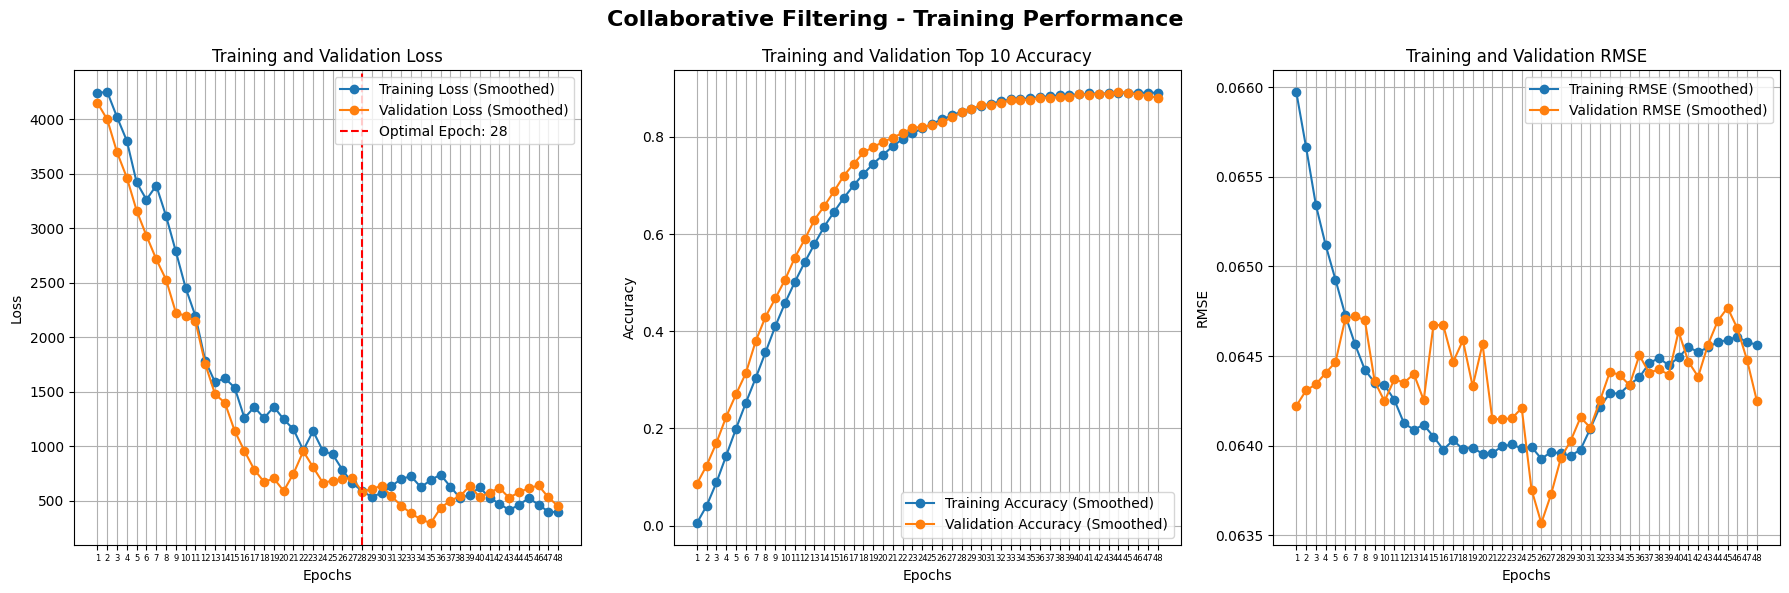

In [ ]:
import matplotlib.pyplot as plt

# Retrieve training historyil8ln
cf_history = best_cf_model.history

cf_optimal_epoch =plot_metrics(cf_history,"Collaborative Filtering - Training Performance")

#### 3.3.2.5 Training Final Model

In [ ]:
best_cf_model = tuner_cf.hypermodel.build(best_cf_hps)
best_cf_model.fit(
    df_tf,
    epochs=cf_optimal_epoch,
    verbose=1
)

best_cf_model.save_weights("cf/weights")

Epoch 1/28
200/200 [==============================] - 494s 2s/step - factorized_top_k/top_1_categorical_accuracy: 7.0964e-04 - factorized_top_k/top_5_categorical_accuracy: 0.0054 - factorized_top_k/top_10_categorical_accuracy: 0.0069 - factorized_top_k/top_50_categorical_accuracy: 0.0137 - factorized_top_k/top_100_categorical_accuracy: 0.0187 - root_mean_squared_error: 0.0654 - loss: 4210.4587 - regularization_loss: 13.2215 - total_loss: 4223.6802
Epoch 2/28
200/200 [==============================] - 463s 2s/step - factorized_top_k/top_1_categorical_accuracy: 0.0668 - factorized_top_k/top_5_categorical_accuracy: 0.2349 - factorized_top_k/top_10_categorical_accuracy: 0.2482 - factorized_top_k/top_50_categorical_accuracy: 0.2780 - factorized_top_k/top_100_categorical_accuracy: 0.2910 - root_mean_squared_error: 0.0645 - loss: 3677.7725 - regularization_loss: 85.9130 - total_loss: 3763.6855
Epoch 3/28
200/200 [==============================] - 452s 2s/step - factorized_top_k/top_1_categori

### 3.3.3 Content Based Filtering

#### 3.3.3.1 Features for Model

In [ ]:
item_features = extract_columns(df_tf, ['item_id', 'item_desc_features', 'item_desc_keyword_features',
                                        'image_features', 'average_rating', 'rating_number'])

# Convert to DataFrame and remove duplicates
item_features_df = pd.DataFrame(item_features).drop_duplicates(subset=["item_id"]).reset_index(drop=True)

# Convert all features to tensors
item_ids = tf.convert_to_tensor(item_features_df["item_id"].astype(str).values, dtype=tf.string)

average_rating = tf.convert_to_tensor(item_features_df["average_rating"].values, dtype=tf.float32)
rating_number = tf.convert_to_tensor(item_features_df["rating_number"].values, dtype=tf.float32)

item_desc_features = tf.convert_to_tensor(item_features_df['item_desc_features'].tolist(), dtype=tf.float32)
item_desc_keyword_features = tf.convert_to_tensor(item_features_df['item_desc_keyword_features'].tolist(), dtype=tf.float32)
image_features = tf.convert_to_tensor(item_features_df['image_features'].tolist(), dtype=tf.float32)

# Stack all features together (but do NOT compute embeddings yet)
all_features = tf.concat([
    item_desc_features, item_desc_keyword_features, image_features,
    tf.expand_dims(average_rating, axis=-1),
    tf.expand_dims(rating_number, axis=-1)
], axis=1)

#### 3.3.3.2 Model

#### 3.3.3.3 Hyper Tuning

In [23]:
class CBModel(tfrs.Model):
    def __init__(self, num_layers, units_per_layer, dropout_rate, l2_reg_dense, l2_reg_embedding, rating_weight=1.0, retrieval_weight=1.0):
        super().__init__()

        # Feature Processing Networks (Each Feature Group Gets Its Own Layers)
        self.text_dense = self._create_dense_block(num_layers, units_per_layer, dropout_rate, l2_reg_dense)
        self.text_dense.add(tf.keras.layers.Dense(1024, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l2_reg_dense)))

        self.image_dense = self._create_dense_block(num_layers, units_per_layer, dropout_rate, l2_reg_dense)
        self.image_dense.add(tf.keras.layers.Dense(512, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l2_reg_dense)))

        self.numeric_dense = self._create_dense_block(num_layers, units_per_layer, dropout_rate, l2_reg_dense)
        self.numeric_dense.add(tf.keras.layers.Dense(2, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l2_reg_dense)))

        # Item embeddings (NOW computed inside the model)
        self.item_model = self._create_dense_block(num_layers, units_per_layer, dropout_rate, l2_reg_embedding)

        # Rating model (Predicting Ratings)
        self.rating_model = self._create_dense_block(num_layers, units_per_layer, dropout_rate, l2_reg_dense)
        self.rating_model.add(tf.keras.layers.Dense(1, activation=None, kernel_regularizer=tf.keras.regularizers.l2(l2_reg_dense)))

        # Compute embeddings dynamically and store properly structured tensors
        self.candidate_ids = tf.reshape(item_ids, (-1,))  # Ensure correct shape
        self.candidate_embeddings = self.item_model(all_features)

        # Use BruteForce Index for Retrieval
        self.index = tfrs.layers.factorized_top_k.BruteForce()
        self.index.index(self.candidate_embeddings, self.candidate_ids)

        # Set up FactorizedTopK retrieval with Properly Structured Data
        self.retrieval_task = tfrs.tasks.Retrieval(
            metrics=tfrs.metrics.FactorizedTopK(candidates=self.index)
        )

        # Rating Task (Ranking Task)
        self.rating_task = tfrs.tasks.Ranking(
            loss=tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError()]
        )

        # Loss Weights
        self.rating_weight = rating_weight
        self.retrieval_weight = retrieval_weight

    def _create_dense_block(self, num_layers, units_per_layer, dropout_rate, l2_reg):
        """Creates a sequential dense block with dropout & L2 regularization."""
        model = tf.keras.Sequential()
        for _ in range(num_layers):
            model.add(tf.keras.layers.Dense(
                units_per_layer, activation="relu",
                kernel_regularizer=tf.keras.regularizers.l2(l2_reg)
            ))
            model.add(tf.keras.layers.Dropout(dropout_rate))  # Apply dropout
        return model

    def call(self, features):
        """
        Calls the model with a dictionary of features.
        """
        # Process Features
        text_output = self.text_dense(tf.concat([features["item_desc_features"], features["item_desc_keyword_features"]], axis=1))
        image_output = self.image_dense(features["image_features"])

        numeric_features = tf.concat([
            tf.expand_dims(features["average_rating"], axis=-1),
            tf.expand_dims(features["rating_number"], axis=-1)
        ], axis=1)

        numeric_output = self.numeric_dense(numeric_features)
        # Combine All Features
        retrieval_features = tf.concat([text_output, image_output, numeric_output], axis=1)
        item_embeddings = self.item_model(retrieval_features)
        rating_predictions = self.rating_model(item_embeddings)

        return {
            "rating": rating_predictions,
            "retrieval": item_embeddings
        }

    def compute_loss(self, features, training=False):
        """Compute combined retrieval and ranking loss."""
        rating_labels = features["weighted_rating"]
        outputs = self(features)

        retrieval_loss = self.retrieval_task(
            query_embeddings=outputs["retrieval"],
            candidate_embeddings=self.item_model(all_features)
        )

        rating_loss = self.rating_task(labels=rating_labels, predictions=outputs["rating"])

        return self.rating_weight * rating_loss + self.retrieval_weight * retrieval_loss



# Function to Build Model with Hyperparameter Tuning
def build_cb_model(hp):
    learning_rate = hp.Choice("learning_rate", values=[0.001, 0.01, 0.1])
    num_layers = hp.Int("num_layers", min_value=1, max_value=3, step=1)
    units_per_layer = hp.Choice("units_per_layer", values=[64, 128, 256])
    dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)
    l2_reg_dense = hp.Float('l2_reg_dense', min_value=0.0001, max_value=0.01, sampling='LOG')
    l2_reg_embedding = hp.Float('l2_reg_embedding', min_value=0.0001, max_value=0.01, sampling='LOG')
    rating_weight = hp.Float('rating_weight', min_value=0.1, max_value=0.9, step=0.1)
    retrieval_weight = 1.0 - rating_weight

    # Create Model Instance
    model = CBModel(
        num_layers=num_layers,
        units_per_layer=units_per_layer,
        dropout_rate=dropout_rate,
        l2_reg_dense=l2_reg_dense,
        l2_reg_embedding=l2_reg_embedding,
        rating_weight=rating_weight,
        retrieval_weight=retrieval_weight
    )

    # Compile the model correctly
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)
    )

    return model

In [ ]:

# Enable XLA optimization
tf.config.optimizer.set_jit(True)


# Initialize Bayesian Optimization
tuner_cb = kt.BayesianOptimization(
    build_cb_model,
    objective=kt.Objective('val_loss', direction='min'),
    max_trials=20,
    executions_per_trial=1,
    directory='tuning',
    project_name='cb_model',
)


tuner_cb.search(
    sample_train_df,
    validation_data=sample_val_df,
    epochs=20,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)],  # Stops early if no improvement
    batch_size=64,
    verbose=1,
)


# Retrieve the best hyperparameters
best_cb_hps = tuner_cb.get_best_hyperparameters(num_trials=1)[0]

# Print best hyperparameter values
print("\n🔹 Best Hyperparameters Found:")
for hp in best_cb_hps.values:
    print(f"{hp}: {best_cb_hps.get(hp)}")

Trial 20 Complete [00h 07m 54s]
val_loss: 710.1033935546875

Best val_loss So Far: 708.5225830078125
Total elapsed time: 06h 25m 17s

🔹 Best Hyperparameters Found:
learning_rate: 0.01
num_layers: 1
units_per_layer: 64
dropout_rate: 0.30000000000000004
l2_reg_dense: 0.0036593395774260525
l2_reg_embedding: 0.00020043172008712458
rating_weight: 0.9


#### 3.3.3.4 Optimal Epoch

In [ ]:
best_cb_model = tuner_cb.hypermodel.build(best_cb_hps)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)
# Train the best model further if necessary
best_cb_model.fit(
    train_df,
    epochs=100,
    validation_data=val_df,
    callbacks=[early_stopping],
    batch_size=64,
    verbose = 1
)

Epoch 1/100
160/160 [==============================] - 209s 1s/step - factorized_top_k/top_1_categorical_accuracy: 0.9890 - factorized_top_k/top_5_categorical_accuracy: 0.9898 - factorized_top_k/top_10_categorical_accuracy: 0.9901 - factorized_top_k/top_50_categorical_accuracy: 0.9904 - factorized_top_k/top_100_categorical_accuracy: 0.9905 - root_mean_squared_error: 0.0835 - loss: 996.1746 - regularization_loss: 1.0449 - total_loss: 997.2194 - val_factorized_top_k/top_1_categorical_accuracy: 1.0000 - val_factorized_top_k/top_5_categorical_accuracy: 1.0000 - val_factorized_top_k/top_10_categorical_accuracy: 1.0000 - val_factorized_top_k/top_50_categorical_accuracy: 1.0000 - val_factorized_top_k/top_100_categorical_accuracy: 1.0000 - val_root_mean_squared_error: 0.0650 - val_loss: 863.2584 - val_regularization_loss: 0.8259 - val_total_loss: 864.0842
Epoch 2/100
160/160 [==============================] - 201s 1s/step - factorized_top_k/top_1_categorical_accuracy: 1.0000 - factorized_top_k

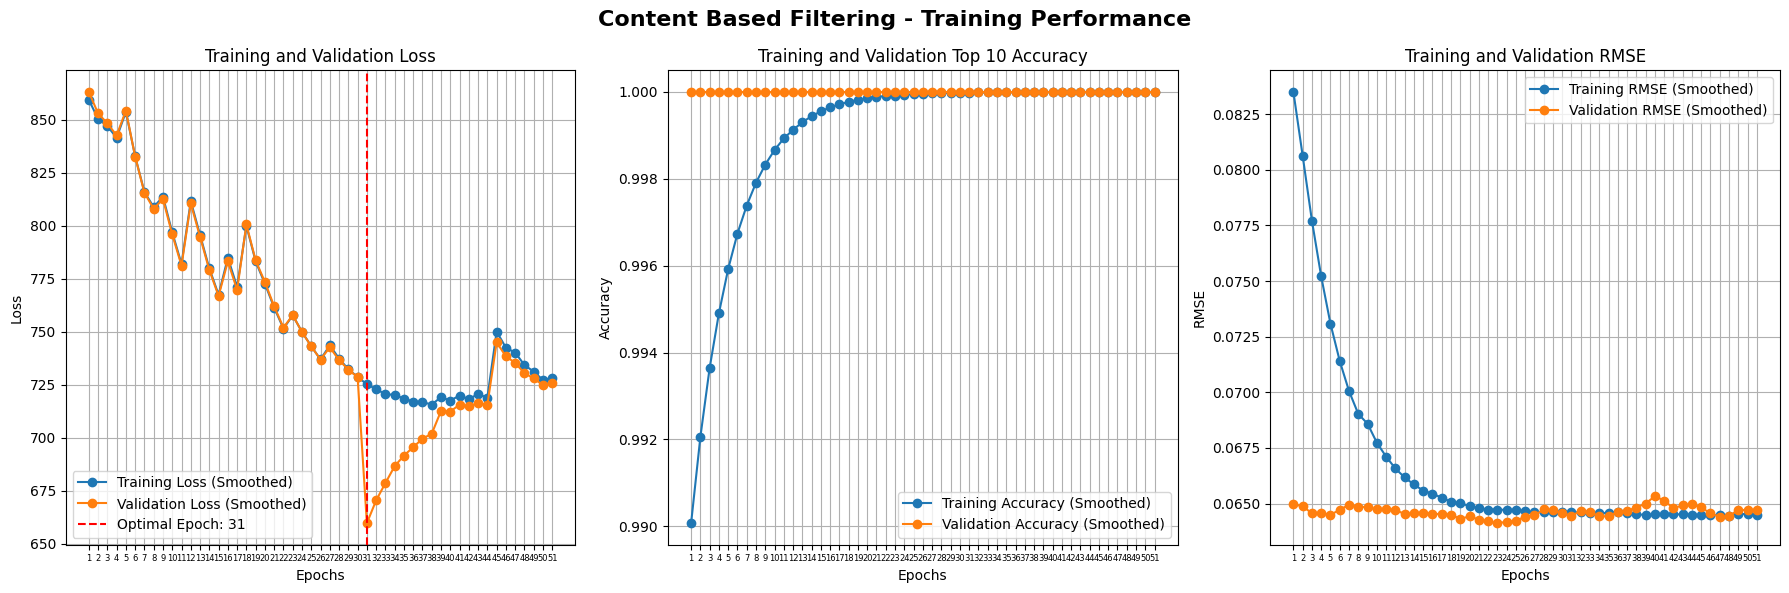

In [ ]:
cb_history = best_cb_model.history

cb_optimal_epoch = plot_metrics(cb_history,"Content Based Filtering - Training Performance")

#### 3.3.3.5 Training Final Model

In [ ]:
# Train the best model further if necessar
best_cb_model.fit(
    df_tf,
    epochs=cb_optimal_epoch,
    verbose = 1
)

best_cb_model.save_weights("cb/weights")

Epoch 1/31
200/200 [==============================] - 234s 1s/step - factorized_top_k/top_1_categorical_accuracy: 0.9983 - factorized_top_k/top_5_categorical_accuracy: 0.9986 - factorized_top_k/top_10_categorical_accuracy: 0.9987 - factorized_top_k/top_50_categorical_accuracy: 0.9989 - factorized_top_k/top_100_categorical_accuracy: 0.9990 - root_mean_squared_error: 0.0645 - loss: 942.1824 - regularization_loss: 0.5104 - total_loss: 942.6928
Epoch 2/31
200/200 [==============================] - 225s 1s/step - factorized_top_k/top_1_categorical_accuracy: 1.0000 - factorized_top_k/top_5_categorical_accuracy: 1.0000 - factorized_top_k/top_10_categorical_accuracy: 1.0000 - factorized_top_k/top_50_categorical_accuracy: 1.0000 - factorized_top_k/top_100_categorical_accuracy: 1.0000 - root_mean_squared_error: 0.0645 - loss: 735.2167 - regularization_loss: 0.4907 - total_loss: 735.7074
Epoch 3/31
200/200 [==============================] - 259s 1s/step - factorized_top_k/top_1_categorical_accura

In [ ]:
tuner_cb = kt.BayesianOptimization(
    build_cb_model,
    objective=kt.Objective('val_loss', direction='min'),
    max_trials=20,
    executions_per_trial=1,
    directory='tuning',
    project_name='cb_model',
)
best_cb_hps = tuner_cb.get_best_hyperparameters(num_trials=1)[0]
best_cb_model = tuner_cb.hypermodel.build(best_cb_hps)

# Recreate the model structure
best_num_layers= best_cb_hps.get("num_layers")
best_units_per_layer = best_cb_hps.get("units_per_layer")
best_dropout_rate = best_cb_hps.get("dropout_rate")
best_l2_reg_dense = best_cb_hps.get("l2_reg_dense")
best_l2_reg_embedding = best_cb_hps.get("l2_reg_embedding")
best_learning_rate = best_cb_hps.get("learning_rate")
best_rating_weight = best_cb_hps.get("rating_weight")
best_retrieval_weight = 1 - best_rating_weight
best_cb_model = CBModel(
    num_layers=best_num_layers,
    units_per_layer=best_units_per_layer,
    dropout_rate=best_dropout_rate,
    l2_reg_dense=best_l2_reg_dense,
    l2_reg_embedding=best_l2_reg_embedding,
    rating_weight=best_rating_weight,
    retrieval_weight=best_retrieval_weight
)
best_cb_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_learning_rate))
best_cb_model.load_weights('cb/weights')

Reloading Tuner from tuning\cb_model\tuner0.json


### 3.3.4 Multimodal Recommender

#### 3.3.4.1 Features for Model

In [ ]:

mm_features = extract_columns(df_tf, ['item_id','item_desc_features','item_desc_keyword_features','image_features','review_features','review_keyword_features','sentiment_score','emotion_score'])

# Convert to DataFrame and deduplicate
mm_features_df = pd.DataFrame(mm_features)
unique_mm_features_df = mm_features_df.groupby('item_id').agg({
    'item_desc_features': 'first',  
    'item_desc_keyword_features': 'first',  
    'image_features': 'first',  
    'review_features': lambda x: np.mean(np.vstack(x.tolist()), axis=0) if len(x) > 0 else np.array([]),
    'review_keyword_features': lambda x: np.mean(np.vstack(x.tolist()), axis=0) if len(x) > 0 else np.array([]),
    'sentiment_score': 'mean',
    'emotion_score': 'mean'
}).reset_index()

item_ids = tf.convert_to_tensor(unique_mm_features_df["item_id"].astype(str).values, dtype=tf.string)

# Convert numerical features to tf.float32 tensors
emotion_score = tf.convert_to_tensor(unique_mm_features_df["emotion_score"].values, dtype=tf.float32)
emotion_score = tf.expand_dims(emotion_score, axis=-1)

sentiment_score = tf.convert_to_tensor(unique_mm_features_df["sentiment_score"].values, dtype=tf.float32)
sentiment_score = tf.expand_dims(sentiment_score, axis=-1)

# Convert all list features to tf.float32 tensors and ensure all are the same type
item_desc_features = tf.convert_to_tensor(unique_mm_features_df['item_desc_features'].tolist(), dtype=tf.float32)
item_desc_keyword_features = tf.convert_to_tensor(unique_mm_features_df['item_desc_keyword_features'].tolist(), dtype=tf.float32)
image_features = tf.convert_to_tensor(unique_mm_features_df['image_features'].tolist(), dtype=tf.float32)
review_features = tf.convert_to_tensor(unique_mm_features_df['review_keyword_features'].tolist(), dtype=tf.float32)
review_keyword_features = tf.convert_to_tensor(unique_mm_features_df['review_keyword_features'].tolist(), dtype=tf.float32)


# Stack all features together
mm_features = tf.concat([
    item_desc_features,
    item_desc_keyword_features,
    image_features,
    review_features,
    review_keyword_features,
    emotion_score,
    sentiment_score
], axis=1)

#### 3.3.4.2 Model

In [31]:
import tensorflow as tf
import tensorflow_recommenders as tfrs
import keras_tuner as kt

class MMModel(tfrs.Model):
    def __init__(self, num_layers, units_per_layer, attention_type, dropout_rate, l2_reg_dense, l2_reg_embedding,
                 num_heads=None, attention_units=64, rating_weight=1.0, retrieval_weight=1.0):
        super().__init__()
        self.attention_type = attention_type

        # Feature Processing Networks
        self.item_desc_dense = self._create_dense_block(num_layers, units_per_layer, dropout_rate, l2_reg_dense)
        self.item_desc_dense.add(tf.keras.layers.Dense(1024, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l2_reg_dense)))

        self.review_dense = self._create_dense_block(num_layers, units_per_layer, dropout_rate, l2_reg_dense)
        self.review_dense.add(tf.keras.layers.Dense(1024, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l2_reg_dense)))

        self.image_dense = self._create_dense_block(num_layers, units_per_layer, dropout_rate, l2_reg_dense)
        self.image_dense.add(tf.keras.layers.Dense(512, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l2_reg_dense)))

        self.sentiment_dense = self._create_dense_block(num_layers, units_per_layer, dropout_rate, l2_reg_dense)
        self.sentiment_dense.add(tf.keras.layers.Dense(2, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l2_reg_dense)))

        # Conditionally define the attention layer
        if attention_type == 'standard':
            self.attention = tf.keras.layers.Attention(use_scale=True)
        elif attention_type == 'multihead':
            self.attention = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=attention_units)

        # Item embeddings and Rating model
        self.item_model = self._create_dense_block(num_layers, units_per_layer, dropout_rate, l2_reg_embedding)

        self.rating_model = self._create_dense_block(num_layers, units_per_layer, dropout_rate, l2_reg_dense)
        self.rating_model.add(tf.keras.layers.Dense(1, activation=None, kernel_regularizer=tf.keras.regularizers.l2(l2_reg_dense)))

        # Compute embeddings dynamically and store properly structured tensors
        self.candidate_ids = tf.reshape(item_ids, (-1,))  # Ensure correct shape
        self.candidate_embeddings = self.item_model(mm_features)

        # Use BruteForce Index for Retrieval
        self.index = tfrs.layers.factorized_top_k.BruteForce()
        self.index.index(self.candidate_embeddings, self.candidate_ids)

        # Set up FactorizedTopK retrieval with Properly Structured Data
        self.retrieval_task = tfrs.tasks.Retrieval(
            metrics=tfrs.metrics.FactorizedTopK(candidates=self.index)
        )
        self.rating_task = tfrs.tasks.Ranking(
            loss=tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError()]
        )

        self.rating_weight = rating_weight
        self.retrieval_weight = retrieval_weight

    def _create_dense_block(self, num_layers, units_per_layer, dropout_rate, l2_reg):
        """Creates a sequential dense block with dropout & L2 regularization."""
        model = tf.keras.Sequential()
        for _ in range(num_layers):
            model.add(tf.keras.layers.Dense(
                units_per_layer, activation="relu",
                kernel_regularizer=tf.keras.regularizers.l2(l2_reg)
            ))
            model.add(tf.keras.layers.Dropout(dropout_rate))  # Apply dropout
        return model

    def call(self, features, training=False):
        # Combine feature processing
        combined_features = tf.concat([
            self.item_desc_dense(tf.concat([features["item_desc_features"], features["item_desc_keyword_features"]], axis=1)),
            self.image_dense(features["image_features"]),
            self.review_dense(tf.concat([features["review_features"], features["review_keyword_features"]], axis=1)),
            self.sentiment_dense(tf.concat([tf.expand_dims(features["sentiment_score"], axis=-1), tf.expand_dims(features["emotion_score"], axis=-1)], axis=1))
        ], axis=1)

        # Ensure proper dimensions for attention layers
        combined_features = tf.expand_dims(combined_features, axis=1)  # Shape: [batch, 1, feature_dim]

        attention_scores = None  # Default

        # Apply attention based on selected type
        if self.attention_type == "standard":
            attended_output, attention_scores = self.attention([combined_features, combined_features], return_attention_scores=True)

        elif self.attention_type == "multihead":
            # MultiHeadAttention
            attended_output = self.attention(query=combined_features, value=combined_features, key=combined_features)

            # Retrieve attention scores from MultiHeadAttention
            attention_scores = self.attention.compute_mask(  # This is a workaround
                tf.ones_like(combined_features), combined_features
            )

        attended_output = tf.squeeze(attended_output, axis=1)  # Remove extra dim

        item_embeddings = self.item_model(attended_output)
        rating_predictions = self.rating_model(item_embeddings)

        return {
            "rating": rating_predictions,
            "retrieval": item_embeddings,
            "attention_scores": attention_scores  # Now correctly returned
        }

    def compute_loss(self, features, training=False):
        outputs = self(features, training)
        rating_labels = features["weighted_rating"]

        # Ensure embeddings are float32 for TFRS compatibility
        retrieval_embeddings = tf.cast(outputs["retrieval"], tf.float32)


        retrieval_loss = self.retrieval_task(
            query_embeddings=retrieval_embeddings,  # Item embedding as query
            candidate_embeddings=self.item_model(mm_features)
        )
        rating_loss = self.rating_task(labels=rating_labels, predictions=outputs["rating"])

        return self.rating_weight * rating_loss + self.retrieval_weight * retrieval_loss

# Function to Build Model with Hyperparameter Tuning
def build_mm_model(hp):
    attention_type = hp.Choice('attention_type', values=['standard', 'multihead'])
    learning_rate = hp.Choice("learning_rate", values=[0.001, 0.01, 0.1])
    num_layers = hp.Int("num_layers", min_value=1, max_value=3, step=1)
    units_per_layer = hp.Choice("units_per_layer", values=[64, 128, 256])
    num_heads = hp.Int('num_heads', min_value=1, max_value=8, step=1) if attention_type == 'multihead' else 1
    attention_units = hp.Int('attention_units', min_value=32, max_value=128, step=32)

    # Hyperparameters for Regularization & Dropout
    dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)
    l2_reg_dense = hp.Float('l2_reg_dense', min_value=0.0001, max_value=0.01, sampling='LOG')
    l2_reg_embedding = hp.Float('l2_reg_embedding', min_value=0.0001, max_value=0.01, sampling='LOG')
    rating_weight = hp.Float('rating_weight', min_value=0.1, max_value=0.9, step=0.1)
    retrieval_weight = 1.0 - rating_weight

    model = MMModel(
        num_layers=num_layers,
        units_per_layer=units_per_layer,
        attention_type=attention_type,
        dropout_rate=dropout_rate,
        l2_reg_dense=l2_reg_dense,
        l2_reg_embedding=l2_reg_embedding,
        num_heads=num_heads,
        attention_units=attention_units,
        rating_weight=rating_weight,
        retrieval_weight=retrieval_weight
    )

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))

    return model

#### 4.3.4.3 Hyper Tuning

In [ ]:
# Enable XLA optimization
tf.config.optimizer.set_jit(True)


# Initialize Bayesian Optimization
tuner_mm = kt.BayesianOptimization(
    build_mm_model,
    objective=kt.Objective('val_loss', direction='min'),
    max_trials=20,
    executions_per_trial=1,
    directory='/content/drive/MyDrive/SIM/last sem cb/thesis/tuning',
    project_name='mm_model',
)



tuner_mm.search(
    sample_train_df,
    validation_data=sample_val_df,
    epochs=20,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)],  # Stops early if no improvement
    batch_size=64,
    verbose=1,
)

# Retrieve the best hyperparameters
best_mm_hps = tuner_mm.get_best_hyperparameters(num_trials=1)[0]

# Print best hyperparameter values
print("\n🔹 Best Hyperparameters Found:")
for hp in best_mm_hps.values:
    print(f"{hp}: {best_mm_hps.get(hp)}")

Trial 20 Complete [00h 26m 01s]
val_loss: 7141.57861328125

Best val_loss So Far: 754.7678833007812
Total elapsed time: 06h 48m 42s

🔹 Best Hyperparameters Found:
attention_type: multihead
learning_rate: 0.01
num_layers: 1
units_per_layer: 256
attention_units: 32
dropout_rate: 0.4
l2_reg_dense: 0.006439485147843038
l2_reg_embedding: 0.0003167431843224537
rating_weight: 0.9
num_heads: 2


#### 4.3.4.4 Optimal Epoch

In [ ]:
best_mm_model = tuner_mm.hypermodel.build(best_mm_hps)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)
# Train the best model further if necessar
best_mm_model.fit(
    train_df,
    epochs=100,
    validation_data=val_df,
    callbacks=[early_stopping],
    batch_size=64,
    verbose = 1
)

Epoch 1/100
160/160 [==============================] - 535s 3s/step - factorized_top_k/top_1_categorical_accuracy: 0.8570 - factorized_top_k/top_5_categorical_accuracy: 0.8792 - factorized_top_k/top_10_categorical_accuracy: 0.8881 - factorized_top_k/top_50_categorical_accuracy: 0.9067 - factorized_top_k/top_100_categorical_accuracy: 0.9146 - root_mean_squared_error: 7.6467 - loss: 1192.6917 - regularization_loss: 21.2187 - total_loss: 1213.9104 - val_factorized_top_k/top_1_categorical_accuracy: 0.9941 - val_factorized_top_k/top_5_categorical_accuracy: 0.9941 - val_factorized_top_k/top_10_categorical_accuracy: 0.9941 - val_factorized_top_k/top_50_categorical_accuracy: 0.9951 - val_factorized_top_k/top_100_categorical_accuracy: 0.9961 - val_root_mean_squared_error: 0.0658 - val_loss: 790.4188 - val_regularization_loss: 20.8303 - val_total_loss: 811.2491
Epoch 2/100
160/160 [==============================] - 520s 3s/step - factorized_top_k/top_1_categorical_accuracy: 0.8201 - factorized_t

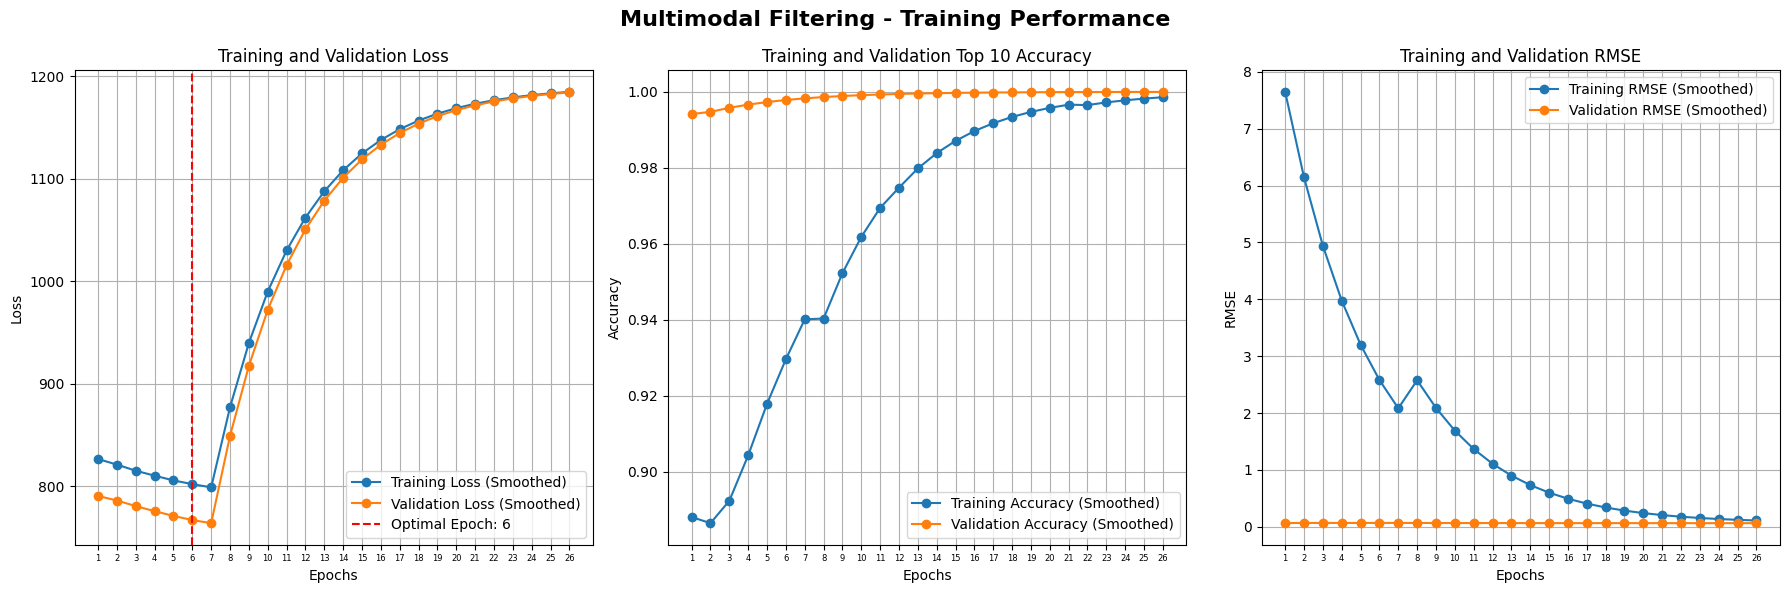

In [ ]:
mm_history = best_mm_model.history

mm_optimal_epoch = plot_metrics(mm_history,"Multimodal Filtering - Training Performance")

#### 4.3.4.5 Training Final Model

In [ ]:
# Train the best model further if necessar
best_mm_model.fit(
    df_tf,
    epochs=mm_optimal_epoch,
    verbose = 1
)
best_mm_model.save_weights("/content/drive/MyDrive/SIM/last sem cb/thesis/mm/weights")

Epoch 1/6
200/200 [==============================] - 541s 3s/step - factorized_top_k/top_1_categorical_accuracy: 0.9792 - factorized_top_k/top_5_categorical_accuracy: 0.9837 - factorized_top_k/top_10_categorical_accuracy: 0.9853 - factorized_top_k/top_50_categorical_accuracy: 0.9884 - factorized_top_k/top_100_categorical_accuracy: 0.9896 - root_mean_squared_error: 0.0869 - loss: 793.1994 - regularization_loss: 8.5016 - total_loss: 801.7009
Epoch 2/6
200/200 [==============================] - 573s 3s/step - factorized_top_k/top_1_categorical_accuracy: 0.9859 - factorized_top_k/top_5_categorical_accuracy: 0.9888 - factorized_top_k/top_10_categorical_accuracy: 0.9897 - factorized_top_k/top_50_categorical_accuracy: 0.9918 - factorized_top_k/top_100_categorical_accuracy: 0.9926 - root_mean_squared_error: 0.0728 - loss: 785.7742 - regularization_loss: 5.1032 - total_loss: 790.8774
Epoch 3/6
200/200 [==============================] - 578s 3s/step - factorized_top_k/top_1_categorical_accuracy:

In [ ]:
tuner_mm = kt.BayesianOptimization(
    build_mm_model,
    objective=kt.Objective('val_loss', direction='min'),
    max_trials=20,
    executions_per_trial=1,
    directory='tuning',
    project_name='mm_model',
)
best_mm_hps = tuner_mm.get_best_hyperparameters(num_trials=1)[0]
best_mm_model = tuner_mm.hypermodel.build(best_mm_hps)
# Recreate the model structure
best_learning_rate = best_mm_hps.get("learning_rate")
best_num_layers = best_mm_hps.get("num_layers")
best_units_per_layer = best_mm_hps.get("units_per_layer")
best_attention_type = best_mm_hps.get("attention_type")
best_attention_units = best_mm_hps.get("attention_units")
best_dropout_rate = best_mm_hps.get("dropout_rate")
best_l2_reg_dense = best_mm_hps.get("l2_reg_dense")
best_l2_reg_embedding = best_mm_hps.get("l2_reg_embedding")
best_rating_weight = best_mm_hps.get("rating_weight")
best_retrieval_weight = 1 - best_rating_weight
try:
    best_num_heads = best_mm_hps.get("num_heads")
except:
    best_num_heads = None
best_mm_model = MMModel(
    num_layers=best_num_layers,
    units_per_layer=best_units_per_layer,
    attention_type=best_attention_type,
    dropout_rate=best_dropout_rate,
    l2_reg_dense=best_l2_reg_dense,
    l2_reg_embedding=best_l2_reg_embedding,
    num_heads=best_num_heads,
    attention_units=best_attention_units,
    rating_weight=best_rating_weight,
    retrieval_weight=best_retrieval_weight
)

best_mm_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_learning_rate))
best_mm_model.load_weights('mm/weights')

Reloading Tuner from tuning\mm_model\tuner0.json


## 3.4 Recommendation Engine Implementation

In [2]:
from sklearn.preprocessing import MinMaxScaler

df = pd.read_pickle('df.pkl')

# Ensure all embedding columns are NumPy arrays
embedding_cols = [
    "item_desc_features",
    "item_desc_keyword_features",
    "image_features",
    "review_features",
    "review_keyword_features"
]

for col in embedding_cols:
    df[col] = df[col].apply(lambda x: np.array(x) if isinstance(x, list) else x)

scaler = MinMaxScaler()
columns_to_normalize = ['average_rating','sentiment_score','weighted_rating', 'rating_number', 'emotion_score']
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [3]:
def build_cf_model_pipeline(df):
    unique_item_ids = np.array(df['parent_asin'].unique()) 
    unique_user_ids = np.array(df['user_id'].unique())
    item_ids = tf.data.Dataset.from_tensor_slices(unique_item_ids)
    #Dependancies
    class CFModel(tfrs.Model):
        def __init__(self, embedding_dim, num_layers, units_per_layer, dropout_rate, l2_reg_dense, l2_reg_embedding,
                    rating_weight, retrieval_weight):
            super().__init__()

            # User & Item Embeddings with L2 Regularization
            self.user_model = tf.keras.Sequential([
                tf.keras.layers.StringLookup(vocabulary=unique_user_ids, mask_token=None),
                tf.keras.layers.Embedding(len(unique_user_ids) + 1, embedding_dim,
                                        embeddings_regularizer=tf.keras.regularizers.l2(l2_reg_embedding))
            ])

            self.item_model = tf.keras.Sequential([
                tf.keras.layers.StringLookup(vocabulary=unique_item_ids, mask_token=None),
                tf.keras.layers.Embedding(len(unique_item_ids) + 1, embedding_dim,
                                        embeddings_regularizer=tf.keras.regularizers.l2(l2_reg_embedding))
            ])

            # Rating model with Dropout & L2 Regularization
            self.rating_model = tf.keras.Sequential()
            for _ in range(num_layers):
                self.rating_model.add(tf.keras.layers.Dense(units_per_layer, activation='relu',
                                                            kernel_regularizer=tf.keras.regularizers.l2(l2_reg_dense)))
                self.rating_model.add(tf.keras.layers.Dropout(dropout_rate))  # Add dropout here

            self.rating_model.add(tf.keras.layers.Dense(1))  # Output layer

            # Retrieval Task
            self.retrieval_task = tfrs.tasks.Retrieval(
                metrics=tfrs.metrics.FactorizedTopK(
                    candidates=item_ids.batch(128).map(self.item_model)
                )
            )

            # Rating Task
            self.rating_task = tfrs.tasks.Ranking(
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=[tf.keras.metrics.RootMeanSquaredError()]
            )

            # Loss weights
            self.rating_weight = rating_weight
            self.retrieval_weight = retrieval_weight

        def call(self, features):
            user_embeddings = self.user_model(features["user_id"])
            item_embeddings = self.item_model(features["item_id"])
            concatenated_embeddings = tf.concat([user_embeddings, item_embeddings], axis=1)

            return (
                user_embeddings,
                item_embeddings,
                self.rating_model(concatenated_embeddings),
            )

        def compute_loss(self, features, training=False):
            rating_labels = features.pop('weighted_rating')
            user_embeddings, item_embeddings, rating_predictions = self(features)

            retrieval_loss = self.retrieval_task(user_embeddings, item_embeddings)
            rating_loss = self.rating_task(labels=rating_labels, predictions=rating_predictions)

            return (self.rating_weight * rating_loss + self.retrieval_weight * retrieval_loss)
    def build_cf_model(hp):
        embedding_dim = hp.Int('embedding_dim', min_value=16, max_value=128, step=16)
        learning_rate = hp.Choice('learning_rate', values=[0.0001, 0.001, 0.01])
        num_layers = hp.Int('num_layers', min_value=1, max_value=3, step=1)
        units_per_layer = hp.Choice('units_per_layer', values=[64, 128, 256])

        # Hyperparameters for Regularization & Dropout
        dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)
        l2_reg_dense = hp.Float('l2_reg_dense', min_value=0.0001, max_value=0.01, sampling='LOG')
        l2_reg_embedding = hp.Float('l2_reg_embedding', min_value=0.0001, max_value=0.01, sampling='LOG')
        rating_weight = hp.Float('rating_weight', min_value=0.1, max_value=0.9, step=0.1)
        retrieval_weight = 1.0 - rating_weight
        model = CFModel(
            embedding_dim, num_layers, units_per_layer,
            dropout_rate, l2_reg_dense, l2_reg_embedding,
            rating_weight, retrieval_weight
        )

        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))

        return model
    # best_hps
    tuner_cf = kt.BayesianOptimization(
        build_cf_model,
        objective=kt.Objective('val_loss', direction='min'),
        max_trials=20,
        executions_per_trial=1,
        directory='tuning',
        project_name='cf_model',
    )
    best_cf_hps = tuner_cf.get_best_hyperparameters(num_trials=1)[0]

    # Recreate the model structure
    best_embedding_dim = best_cf_hps.get("embedding_dim")
    best_learning_rate = best_cf_hps.get("learning_rate")
    best_num_layers = best_cf_hps.get("num_layers")
    best_units_per_layer = best_cf_hps.get("units_per_layer")
    best_dropout_rate = best_cf_hps.get("dropout_rate")
    best_l2_reg_dense = best_cf_hps.get("l2_reg_dense")
    best_l2_reg_embedding = best_cf_hps.get("l2_reg_embedding")
    best_rating_weight = best_cf_hps.get("rating_weight")
    best_retrieval_weight = 1 - best_rating_weight
    best_cf_model = CFModel(
        embedding_dim=best_embedding_dim,
        num_layers=best_num_layers,
        units_per_layer=best_units_per_layer,
        dropout_rate=best_dropout_rate,
        l2_reg_dense=best_l2_reg_dense,
        l2_reg_embedding=best_l2_reg_embedding,
        rating_weight=best_rating_weight,
        retrieval_weight=best_retrieval_weight
    )
    best_cf_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_learning_rate))
    best_cf_model.load_weights('cf/weights')
    return best_cf_model

best_cf_model = build_cf_model_pipeline(df)

Reloading Tuner from tuning\cf_model\tuner0.json


In [4]:
def build_cb_model_pipeline(df):    
    # Dependencies
    item_features = df[['parent_asin', 'item_desc_features', 'item_desc_keyword_features', 'image_features', 'average_rating', 'rating_number']]
    item_features_df = pd.DataFrame(item_features).drop_duplicates(subset=["parent_asin"]).reset_index(drop=True)

    # Convert all features to tensors
    item_ids = tf.convert_to_tensor(item_features_df["parent_asin"].astype(str).values, dtype=tf.string)

    average_rating = tf.convert_to_tensor(item_features_df["average_rating"].values, dtype=tf.float32)
    rating_number = tf.convert_to_tensor(item_features_df["rating_number"].values, dtype=tf.float32)

    item_desc_features = tf.convert_to_tensor(item_features_df['item_desc_features'].tolist(), dtype=tf.float32)
    item_desc_keyword_features = tf.convert_to_tensor(item_features_df['item_desc_keyword_features'].tolist(), dtype=tf.float32)
    image_features = tf.convert_to_tensor(item_features_df['image_features'].tolist(), dtype=tf.float32)

    # Stack all features together (but do NOT compute embeddings yet)
    all_features = tf.concat([
        item_desc_features, item_desc_keyword_features, image_features,
        tf.expand_dims(average_rating, axis=-1),
        tf.expand_dims(rating_number, axis=-1)
    ], axis=1)
    class CBModel(tfrs.Model):
        def __init__(self, num_layers, units_per_layer, dropout_rate, l2_reg_dense, l2_reg_embedding, rating_weight=1.0, retrieval_weight=1.0):
            super().__init__()

            # Feature Processing Networks (Each Feature Group Gets Its Own Layers)
            self.text_dense = self._create_dense_block(num_layers, units_per_layer, dropout_rate, l2_reg_dense)
            self.text_dense.add(tf.keras.layers.Dense(1024, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l2_reg_dense)))

            self.image_dense = self._create_dense_block(num_layers, units_per_layer, dropout_rate, l2_reg_dense)
            self.image_dense.add(tf.keras.layers.Dense(512, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l2_reg_dense)))

            self.numeric_dense = self._create_dense_block(num_layers, units_per_layer, dropout_rate, l2_reg_dense)
            self.numeric_dense.add(tf.keras.layers.Dense(2, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l2_reg_dense)))

            # Item embeddings (NOW computed inside the model)
            self.item_model = self._create_dense_block(num_layers, units_per_layer, dropout_rate, l2_reg_embedding)

            # Rating model (Predicting Ratings)
            self.rating_model = self._create_dense_block(num_layers, units_per_layer, dropout_rate, l2_reg_dense)
            self.rating_model.add(tf.keras.layers.Dense(1, activation=None, kernel_regularizer=tf.keras.regularizers.l2(l2_reg_dense)))

            # Compute embeddings dynamically and store properly structured tensors
            self.candidate_ids = tf.reshape(item_ids, (-1,))  # Ensure correct shape
            self.candidate_embeddings = self.item_model(all_features)

            # Use BruteForce Index for Retrieval
            self.index = tfrs.layers.factorized_top_k.BruteForce()
            self.index.index(self.candidate_embeddings, self.candidate_ids)

            # Set up FactorizedTopK retrieval with Properly Structured Data
            self.retrieval_task = tfrs.tasks.Retrieval(
                metrics=tfrs.metrics.FactorizedTopK(candidates=self.index)
            )

            # Rating Task (Ranking Task)
            self.rating_task = tfrs.tasks.Ranking(
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=[tf.keras.metrics.RootMeanSquaredError()]
            )

            # Loss Weights
            self.rating_weight = rating_weight
            self.retrieval_weight = retrieval_weight

        def _create_dense_block(self, num_layers, units_per_layer, dropout_rate, l2_reg):
            """Creates a sequential dense block with dropout & L2 regularization."""
            model = tf.keras.Sequential()
            for _ in range(num_layers):
                model.add(tf.keras.layers.Dense(
                    units_per_layer, activation="relu",
                    kernel_regularizer=tf.keras.regularizers.l2(l2_reg)
                ))
                model.add(tf.keras.layers.Dropout(dropout_rate))  # Apply dropout
            return model

        def call(self, features):
            """
            Calls the model with a dictionary of features.
            """
            # Process Features
            text_output = self.text_dense(tf.concat([features["item_desc_features"], features["item_desc_keyword_features"]], axis=1))
            image_output = self.image_dense(features["image_features"])

            numeric_features = tf.concat([
                tf.expand_dims(features["average_rating"], axis=-1),
                tf.expand_dims(features["rating_number"], axis=-1)
            ], axis=1)

            numeric_output = self.numeric_dense(numeric_features)
            # Combine All Features
            retrieval_features = tf.concat([text_output, image_output, numeric_output], axis=1)
            item_embeddings = self.item_model(retrieval_features)
            rating_predictions = self.rating_model(item_embeddings)

            return {
                "rating": rating_predictions,
                "retrieval": item_embeddings
            }

        def compute_loss(self, features, training=False):
            """Compute combined retrieval and ranking loss."""
            rating_labels = features["weighted_rating"]
            outputs = self(features)

            retrieval_loss = self.retrieval_task(
                query_embeddings=outputs["retrieval"],
                candidate_embeddings=self.item_model(all_features)
            )

            rating_loss = self.rating_task(labels=rating_labels, predictions=outputs["rating"])

            return self.rating_weight * rating_loss + self.retrieval_weight * retrieval_loss
    # Function to Build Model with Hyperparameter Tuning
    def build_cb_model(hp):
        learning_rate = hp.Choice("learning_rate", values=[0.001, 0.01, 0.1])
        num_layers = hp.Int("num_layers", min_value=1, max_value=3, step=1)
        units_per_layer = hp.Choice("units_per_layer", values=[64, 128, 256])
        dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)
        l2_reg_dense = hp.Float('l2_reg_dense', min_value=0.0001, max_value=0.01, sampling='LOG')
        l2_reg_embedding = hp.Float('l2_reg_embedding', min_value=0.0001, max_value=0.01, sampling='LOG')
        rating_weight = hp.Float('rating_weight', min_value=0.1, max_value=0.9, step=0.1)
        retrieval_weight = 1.0 - rating_weight

        # Create Model Instance
        model = CBModel(
            num_layers=num_layers,
            units_per_layer=units_per_layer,
            dropout_rate=dropout_rate,
            l2_reg_dense=l2_reg_dense,
            l2_reg_embedding=l2_reg_embedding,
            rating_weight=rating_weight,
            retrieval_weight=retrieval_weight
        )

        # Compile the model correctly
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)
        )

        return model
    
    tuner_cb = kt.BayesianOptimization(
        build_cb_model,
        objective=kt.Objective('val_loss', direction='min'),
        max_trials=20,
        executions_per_trial=1,
        directory='tuning',
        project_name='cb_model',
    )
    best_cb_hps = tuner_cb.get_best_hyperparameters(num_trials=1)[0]
    best_cb_model = tuner_cb.hypermodel.build(best_cb_hps)

    # Recreate the model structure
    best_num_layers= best_cb_hps.get("num_layers")
    best_units_per_layer = best_cb_hps.get("units_per_layer")
    best_dropout_rate = best_cb_hps.get("dropout_rate")
    best_l2_reg_dense = best_cb_hps.get("l2_reg_dense")
    best_l2_reg_embedding = best_cb_hps.get("l2_reg_embedding")
    best_learning_rate = best_cb_hps.get("learning_rate")
    best_rating_weight = best_cb_hps.get("rating_weight")
    best_retrieval_weight = 1 - best_rating_weight
    best_cb_model = CBModel(
        num_layers=best_num_layers,
        units_per_layer=best_units_per_layer,
        dropout_rate=best_dropout_rate,
        l2_reg_dense=best_l2_reg_dense,
        l2_reg_embedding=best_l2_reg_embedding,
        rating_weight=best_rating_weight,
        retrieval_weight=best_retrieval_weight
    )
    best_cb_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_learning_rate))
    best_cb_model.load_weights('cb/weights')
    return best_cb_model

best_cb_model = build_cb_model_pipeline(df)

Reloading Tuner from tuning\cb_model\tuner0.json


In [5]:
def build_mm_model_pipeline(df):
    #Dependencies
    mm_features_df = df[ ['parent_asin','item_desc_features','item_desc_keyword_features','image_features','review_features','review_keyword_features','sentiment_score','emotion_score']]
    unique_mm_features_df = mm_features_df.groupby('parent_asin').agg({
        'item_desc_features': 'first',  
        'item_desc_keyword_features': 'first',  
        'image_features': 'first',  
        'review_features': lambda x: np.mean(np.vstack(x.tolist()), axis=0) if len(x) > 0 else np.array([]),
        'review_keyword_features': lambda x: np.mean(np.vstack(x.tolist()), axis=0) if len(x) > 0 else np.array([]),
        'sentiment_score': 'mean',
        'emotion_score': 'mean'
    }).reset_index()

    item_ids = tf.convert_to_tensor(unique_mm_features_df["parent_asin"].astype(str).values, dtype=tf.string)

    # Convert numerical features to tf.float32 tensors
    emotion_score = tf.convert_to_tensor(unique_mm_features_df["emotion_score"].values, dtype=tf.float32)
    emotion_score = tf.expand_dims(emotion_score, axis=-1)

    sentiment_score = tf.convert_to_tensor(unique_mm_features_df["sentiment_score"].values, dtype=tf.float32)
    sentiment_score = tf.expand_dims(sentiment_score, axis=-1)

    # Convert all list features to tf.float32 tensors and ensure all are the same type
    item_desc_features = tf.convert_to_tensor(unique_mm_features_df['item_desc_features'].tolist(), dtype=tf.float32)
    item_desc_keyword_features = tf.convert_to_tensor(unique_mm_features_df['item_desc_keyword_features'].tolist(), dtype=tf.float32)
    image_features = tf.convert_to_tensor(unique_mm_features_df['image_features'].tolist(), dtype=tf.float32)
    review_features = tf.convert_to_tensor(unique_mm_features_df['review_keyword_features'].tolist(), dtype=tf.float32)
    review_keyword_features = tf.convert_to_tensor(unique_mm_features_df['review_keyword_features'].tolist(), dtype=tf.float32)


    # Stack all features together
    mm_features = tf.concat([
        item_desc_features,
        item_desc_keyword_features,
        image_features,
        review_features,
        review_keyword_features,
        emotion_score,
        sentiment_score
    ], axis=1)       
    
    class MMModel(tfrs.Model):
        def __init__(self, num_layers, units_per_layer, attention_type, dropout_rate, l2_reg_dense, l2_reg_embedding,
                    num_heads=None, attention_units=64, rating_weight=1.0, retrieval_weight=1.0):
            super().__init__()
            self.attention_type = attention_type

            # Feature Processing Networks
            self.item_desc_dense = self._create_dense_block(num_layers, units_per_layer, dropout_rate, l2_reg_dense)
            self.item_desc_dense.add(tf.keras.layers.Dense(1024, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l2_reg_dense)))

            self.review_dense = self._create_dense_block(num_layers, units_per_layer, dropout_rate, l2_reg_dense)
            self.review_dense.add(tf.keras.layers.Dense(1024, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l2_reg_dense)))

            self.image_dense = self._create_dense_block(num_layers, units_per_layer, dropout_rate, l2_reg_dense)
            self.image_dense.add(tf.keras.layers.Dense(512, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l2_reg_dense)))

            self.sentiment_dense = self._create_dense_block(num_layers, units_per_layer, dropout_rate, l2_reg_dense)
            self.sentiment_dense.add(tf.keras.layers.Dense(2, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l2_reg_dense)))

            # Conditionally define the attention layer
            if attention_type == 'standard':
                self.attention = tf.keras.layers.Attention(use_scale=True)
            elif attention_type == 'multihead':
                self.attention = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=attention_units)

            # Item embeddings and Rating model
            self.item_model = self._create_dense_block(num_layers, units_per_layer, dropout_rate, l2_reg_embedding)

            self.rating_model = self._create_dense_block(num_layers, units_per_layer, dropout_rate, l2_reg_dense)
            self.rating_model.add(tf.keras.layers.Dense(1, activation=None, kernel_regularizer=tf.keras.regularizers.l2(l2_reg_dense)))

            # Compute embeddings dynamically and store properly structured tensors
            self.candidate_ids = tf.reshape(item_ids, (-1,))  # Ensure correct shape
            self.candidate_embeddings = self.item_model(mm_features)

            # Use BruteForce Index for Retrieval
            self.index = tfrs.layers.factorized_top_k.BruteForce()
            self.index.index(self.candidate_embeddings, self.candidate_ids)

            # Set up FactorizedTopK retrieval with Properly Structured Data
            self.retrieval_task = tfrs.tasks.Retrieval(
                metrics=tfrs.metrics.FactorizedTopK(candidates=self.index)
            )
            self.rating_task = tfrs.tasks.Ranking(
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=[tf.keras.metrics.RootMeanSquaredError()]
            )

            self.rating_weight = rating_weight
            self.retrieval_weight = retrieval_weight

        def _create_dense_block(self, num_layers, units_per_layer, dropout_rate, l2_reg):
            """Creates a sequential dense block with dropout & L2 regularization."""
            model = tf.keras.Sequential()
            for _ in range(num_layers):
                model.add(tf.keras.layers.Dense(
                    units_per_layer, activation="relu",
                    kernel_regularizer=tf.keras.regularizers.l2(l2_reg)
                ))
                model.add(tf.keras.layers.Dropout(dropout_rate))  # Apply dropout
            return model

        def call(self, features, training=False):
            # Combine feature processing
            combined_features = tf.concat([
                self.item_desc_dense(tf.concat([features["item_desc_features"], features["item_desc_keyword_features"]], axis=1)),
                self.image_dense(features["image_features"]),
                self.review_dense(tf.concat([features["review_features"], features["review_keyword_features"]], axis=1)),
                self.sentiment_dense(tf.concat([tf.expand_dims(features["sentiment_score"], axis=-1), tf.expand_dims(features["emotion_score"], axis=-1)], axis=1))
            ], axis=1)

            # Ensure proper dimensions for attention layers
            combined_features = tf.expand_dims(combined_features, axis=1)  # Shape: [batch, 1, feature_dim]

            attention_scores = None  # Default

            # Apply attention based on selected type
            if self.attention_type == "standard":
                attended_output, attention_scores = self.attention([combined_features, combined_features], return_attention_scores=True)

            elif self.attention_type == "multihead":
                # MultiHeadAttention
                attended_output = self.attention(query=combined_features, value=combined_features, key=combined_features)

                # Retrieve attention scores from MultiHeadAttention
                attention_scores = self.attention.compute_mask(  # This is a workaround
                    tf.ones_like(combined_features), combined_features
                )

            attended_output = tf.squeeze(attended_output, axis=1)  # Remove extra dim

            item_embeddings = self.item_model(attended_output)
            rating_predictions = self.rating_model(item_embeddings)

            return {
                "rating": rating_predictions,
                "retrieval": item_embeddings,
                "attention_scores": attention_scores  # Now correctly returned
            }

        def compute_loss(self, features, training=False):
            outputs = self(features, training)
            rating_labels = features["weighted_rating"]

            # Ensure embeddings are float32 for TFRS compatibility
            retrieval_embeddings = tf.cast(outputs["retrieval"], tf.float32)


            retrieval_loss = self.retrieval_task(
                query_embeddings=retrieval_embeddings,  # Item embedding as query
                candidate_embeddings=self.item_model(mm_features)
            )
            rating_loss = self.rating_task(labels=rating_labels, predictions=outputs["rating"])

            return self.rating_weight * rating_loss + self.retrieval_weight * retrieval_loss

    # Function to Build Model with Hyperparameter Tuning
    def build_mm_model(hp):
        attention_type = hp.Choice('attention_type', values=['standard', 'multihead'])
        learning_rate = hp.Choice("learning_rate", values=[0.001, 0.01, 0.1])
        num_layers = hp.Int("num_layers", min_value=1, max_value=3, step=1)
        units_per_layer = hp.Choice("units_per_layer", values=[64, 128, 256])
        num_heads = hp.Int('num_heads', min_value=1, max_value=8, step=1) if attention_type == 'multihead' else 1
        attention_units = hp.Int('attention_units', min_value=32, max_value=128, step=32)

        # Hyperparameters for Regularization & Dropout
        dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)
        l2_reg_dense = hp.Float('l2_reg_dense', min_value=0.0001, max_value=0.01, sampling='LOG')
        l2_reg_embedding = hp.Float('l2_reg_embedding', min_value=0.0001, max_value=0.01, sampling='LOG')
        rating_weight = hp.Float('rating_weight', min_value=0.1, max_value=0.9, step=0.1)
        retrieval_weight = 1.0 - rating_weight

        model = MMModel(
            num_layers=num_layers,
            units_per_layer=units_per_layer,
            attention_type=attention_type,
            dropout_rate=dropout_rate,
            l2_reg_dense=l2_reg_dense,
            l2_reg_embedding=l2_reg_embedding,
            num_heads=num_heads,
            attention_units=attention_units,
            rating_weight=rating_weight,
            retrieval_weight=retrieval_weight
        )

        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))

        return model

    tuner_mm = kt.BayesianOptimization(
        build_mm_model,
        objective=kt.Objective('val_loss', direction='min'),
        max_trials=20,
        executions_per_trial=1,
        directory='tuning',
        project_name='mm_model',
    )
    best_mm_hps = tuner_mm.get_best_hyperparameters(num_trials=1)[0]
    best_mm_model = tuner_mm.hypermodel.build(best_mm_hps)
    # Recreate the model structure
    best_learning_rate = best_mm_hps.get("learning_rate")
    best_num_layers = best_mm_hps.get("num_layers")
    best_units_per_layer = best_mm_hps.get("units_per_layer")
    best_attention_type = best_mm_hps.get("attention_type")
    best_attention_units = best_mm_hps.get("attention_units")
    best_dropout_rate = best_mm_hps.get("dropout_rate")
    best_l2_reg_dense = best_mm_hps.get("l2_reg_dense")
    best_l2_reg_embedding = best_mm_hps.get("l2_reg_embedding")
    best_rating_weight = best_mm_hps.get("rating_weight")
    best_retrieval_weight = 1 - best_rating_weight
    try:
        best_num_heads = best_mm_hps.get("num_heads")
    except:
        best_num_heads = None
    best_mm_model = MMModel(
        num_layers=best_num_layers,
        units_per_layer=best_units_per_layer,
        attention_type=best_attention_type,
        dropout_rate=best_dropout_rate,
        l2_reg_dense=best_l2_reg_dense,
        l2_reg_embedding=best_l2_reg_embedding,
        num_heads=best_num_heads,
        attention_units=best_attention_units,
        rating_weight=best_rating_weight,
        retrieval_weight=best_retrieval_weight
    )

    best_mm_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_learning_rate))
    best_mm_model.load_weights('mm/weights')
    return best_mm_model

best_mm_model = build_mm_model_pipeline(df)

Reloading Tuner from tuning\mm_model\tuner0.json


In [ ]:
def get_hybrid_recommendations(input_features, dataset, best_cf_model, best_cb_model, best_mm_model,
                                top_n=10, weight_cf=0.3, weight_cb=0.3, weight_mm=0.4):

    def prepare_cb_features(df):
        return {
            "item_desc_features": tf.convert_to_tensor(np.stack(df["item_desc_features"].to_list()), dtype=tf.float32),
            "item_desc_keyword_features": tf.convert_to_tensor(np.stack(df["item_desc_keyword_features"].to_list()), dtype=tf.float32),
            "image_features": tf.convert_to_tensor(np.stack(df["image_features"].to_list()), dtype=tf.float32),
            "average_rating": tf.convert_to_tensor(df["average_rating"].values.astype(np.float32)),
            "rating_number": tf.convert_to_tensor(df["rating_number"].values.astype(np.float32)),
        }

    def prepare_mm_features(df):
        return {
            "item_desc_features": tf.convert_to_tensor(np.stack(df["item_desc_features"].to_list()), dtype=tf.float32),
            "item_desc_keyword_features": tf.convert_to_tensor(np.stack(df["item_desc_keyword_features"].to_list()), dtype=tf.float32),
            "image_features": tf.convert_to_tensor(np.stack(df["image_features"].to_list()), dtype=tf.float32),
            "review_features": tf.convert_to_tensor(np.stack(df["review_features"].to_list()), dtype=tf.float32),
            "review_keyword_features": tf.convert_to_tensor(np.stack(df["review_keyword_features"].to_list()), dtype=tf.float32),
            "sentiment_score": tf.convert_to_tensor(df["sentiment_score"].values.astype(np.float32)),
            "emotion_score": tf.convert_to_tensor(df["emotion_score"].values.astype(np.float32)),
        }

    def get_cf_recommendations(user_id, model, df, top_n=100):
        if weight_cf == 0 or user_id not in df["user_id"].unique():
            return {}

        items = np.array(df['parent_asin'].unique(), dtype=str)
        input_dict = {
            "user_id": tf.convert_to_tensor([user_id] * len(items)),
            "item_id": tf.convert_to_tensor(items)
        }

        _, _, ratings = model(input_dict)
        ratings = ratings.numpy().squeeze()

        top_indices = np.argsort(ratings)[::-1][:top_n]
        top_items = {items[i]: ratings[i] for i in top_indices}

        return top_items

    def get_cb_recommendations(input_features, model, df, top_n=100):
        if weight_cb == 0:
            return {}

        cb_items = df[['parent_asin', 'item_desc_features', 'item_desc_keyword_features', 'image_features',
                    'average_rating', 'rating_number']].drop_duplicates('parent_asin').reset_index(drop=True)

        input_tensor = prepare_cb_features(input_features)
        input_embedding = model(input_tensor)["retrieval"].numpy()
        cb_tensor = prepare_cb_features(cb_items)
        cb_embeddings = model(cb_tensor)["retrieval"].numpy()
        predicted_ratings = model(cb_tensor)["rating"].numpy().flatten()

        # Dot product similarity
        dot = np.dot(input_embedding, cb_embeddings.T).flatten()
        dot_min, dot_max = dot.min(), dot.max()
        dot_norm = (dot - dot_min) / (dot_max - dot_min + 1e-8)


        top_indices = np.argsort(-dot_norm)[:top_n]
        top_asins = cb_items.iloc[top_indices]["parent_asin"].values
        top_scores = {top_asins[i]: predicted_ratings[top_indices[i]] for i in range(len(top_indices))}

        return top_scores

    def get_mm_recommendations(input_features, model, df, top_n=100):
        if weight_mm == 0:
            return {}

        mm_items = df[['parent_asin', 'item_desc_features', 'item_desc_keyword_features', 'image_features',
                    'review_features', 'review_keyword_features', 'sentiment_score', 'emotion_score']
                    ].drop_duplicates('parent_asin').reset_index(drop=True)

        input_tensor = prepare_mm_features(input_features)
        input_embedding = model(input_tensor)["retrieval"].numpy()
        mm_tensor = prepare_mm_features(mm_items)
        mm_embeddings = model(mm_tensor)["retrieval"].numpy()
        predicted_ratings = model(mm_tensor)["rating"].numpy().flatten()

        # Dot product similarity
        dot = np.dot(input_embedding, mm_embeddings.T).flatten()
        dot_min, dot_max = dot.min(), dot.max()
        dot_norm = (dot - dot_min) / (dot_max - dot_min + 1e-8)


        top_indices = np.argsort(-dot_norm)[:top_n]
        top_asins = mm_items.iloc[top_indices]["parent_asin"].values
        top_scores = {top_asins[i]: predicted_ratings[top_indices[i]] for i in range(len(top_indices))}

        return top_scores


    user_id = input_features.iloc[0].get("user_id", "0")

    cf_scores = get_cf_recommendations(user_id, best_cf_model, dataset, top_n=100)
    cb_scores = get_cb_recommendations(input_features, best_cb_model, dataset, top_n=100)
    mm_scores = get_mm_recommendations(input_features, best_mm_model, dataset, top_n=100)

    # Merge scores
    merged = {}
    all_items = set(cf_scores) | set(cb_scores) | set(mm_scores)

    for item in all_items:
        cf = cf_scores.get(item, 0)
        cb = cb_scores.get(item, 0)
        mm = mm_scores.get(item, 0)
        score = weight_cf * cf + weight_cb * cb + weight_mm * mm
        merged[item] = score

    top_items = sorted(merged.items(), key=lambda x: x[1], reverse=True)[:top_n]

    return top_items


In [7]:
# Get the first row from the DataFrame
first_row = df.iloc[0]

# Convert to input_features DataFrame (same format)
input_features = pd.DataFrame([{
    "user_id": first_row["user_id"],
    "parent_asin": first_row["parent_asin"],
    "item_desc_features": first_row["item_desc_features"],
    "item_desc_keyword_features": first_row["item_desc_keyword_features"],
    "image_features": first_row["image_features"],
    "review_features": first_row["review_features"],
    "review_keyword_features": first_row["review_keyword_features"],
    "sentiment_score": float(first_row["sentiment_score"]),
    "emotion_score": float(first_row["emotion_score"]),
    "average_rating": float(first_row["average_rating"]),
    "rating_number": float(first_row["rating_number"]),
    "weighted_rating": float(first_row["weighted_rating"]),
}])

In [8]:
# Example Usage
top_hybrid_recommendations = get_hybrid_recommendations(input_features, df, top_n=10, weight_cf=1, weight_cb=0, weight_mm=0)
print("Top 10 Hybrid Recommendations:", top_hybrid_recommendations)

Top 10 Hybrid Recommendations: [('B0141SHQXU', 0.15686550736427307), ('B08JJDQY5F', 0.15562477707862854), ('B07WSTLQGX', 0.15253998339176178), ('B07G8VS9R7', 0.1518833339214325), ('B08XYPX3FG', 0.1514929234981537), ('B01MG7E20S', 0.15139971673488617), ('B08LCTTD2C', 0.15110859274864197), ('B01LYEL6UY', 0.1506248265504837), ('B09CHL3DWL', 0.14992080628871918), ('B09HH7661G', 0.14987751841545105)]


## 3.6 Evaluation Metrics

In [9]:
# Sample users and items
sample_users = np.random.choice(df['user_id'].unique(), 2000, replace=False)
sample_items = np.random.choice(df['parent_asin'].unique(), 2000, replace=False)

df_sample = df[df['user_id'].isin(sample_users) | df['parent_asin'].isin(sample_items)]


In [10]:
# --- Traditional CF: User-User Cosine Similarity ---
def run_baseline_cf(df, top_n=10):
    df_cleaned = df.groupby(['user_id', 'parent_asin'])['weighted_rating'].mean().reset_index()
    user_item_matrix = df_cleaned.pivot(index='user_id', columns='parent_asin', values='weighted_rating').fillna(0)
    matrix = user_item_matrix.values
    similarity = np.dot(matrix, matrix.T)
    norms = np.linalg.norm(matrix, axis=1)
    similarity = similarity / (norms[:, None] * norms[None, :] + 1e-8)
    sim_df = pd.DataFrame(similarity, index=user_item_matrix.index, columns=user_item_matrix.index)
    topn_cf = defaultdict(list)
    for user_id in user_item_matrix.index:
        similar_users = sim_df[user_id].sort_values(ascending=False)[1:]
        numerator = user_item_matrix.loc[similar_users.index].T.dot(similar_users)
        denominator = np.abs(similar_users).sum() + 1e-8
        predicted_ratings = numerator / denominator
        already_rated = user_item_matrix.loc[user_id]
        unrated_predictions = predicted_ratings[already_rated == 0]
        top_items = unrated_predictions.sort_values(ascending=False).head(top_n)
        topn_cf[user_id] = list(zip(top_items.index, top_items.values))
    return topn_cf

In [11]:
def run_baseline_cb(df, top_n=10):
    item_features = df.groupby('parent_asin')['item_desc_features'].apply(
        lambda x: np.mean(np.stack(x), axis=0)
    ).reset_index()
    item_matrix = np.stack(item_features['item_desc_features'].values)
    norms = np.linalg.norm(item_matrix, axis=1)
    sim_matrix = np.dot(item_matrix, item_matrix.T)
    sim_matrix = sim_matrix / (norms[:, None] * norms[None, :] + 1e-8)
    sim_df = pd.DataFrame(sim_matrix, index=item_features['parent_asin'], columns=item_features['parent_asin'])

    topn_cb = defaultdict(list)
    for user_id, group in df.groupby('user_id'):
        rated_items = group['parent_asin'].tolist()
        rated_weights = dict(zip(group['parent_asin'], group['weighted_rating']))
        all_scores = defaultdict(float)
        all_weights = defaultdict(float)
        for item in rated_items:
            if item in sim_df.index:
                similar_items = sim_df[item].drop(index=rated_items, errors='ignore')
                for sim_item, sim_score in similar_items.items():
                    all_scores[sim_item] += sim_score * rated_weights.get(item, 1.0)
                    all_weights[sim_item] += np.abs(sim_score)
        predicted_scores = {item: all_scores[item] / (all_weights[item] + 1e-8) for item in all_scores}
        sorted_items = sorted(predicted_scores.items(), key=lambda x: x[1], reverse=True)[:top_n]
        topn_cb[user_id] = sorted_items
    return topn_cb

In [43]:
def get_ground_truth(df, k=10):
    return df.sort_values('weighted_rating', ascending=False).groupby('user_id').head(k).groupby('user_id')['parent_asin'].apply(set).to_dict()

def evaluate_topk(predictions, ground_truth, k=10):
    results = {"Precision@K": [], "Recall@K": [], "F1 Score": [], "Accuracy": []}
    for user, preds in predictions.items():
        pred_topk = [item for item, _ in preds][:k]
        actual = ground_truth.get(user, set())
        if not actual:
            continue
        pred_set = set(pred_topk)
        tp = len(pred_set & actual)
        fp = len(pred_set - actual)
        fn = len(actual - pred_set)
        precision = tp / (tp + fp + 1e-8)
        recall = tp / (tp + fn + 1e-8)
        f1 = 2 * precision * recall / (precision + recall + 1e-8)
        acc = tp / k
        results["Precision@K"].append(precision)
        results["Recall@K"].append(recall)
        results["F1 Score"].append(f1)
        results["Accuracy"].append(acc)
    return {metric: round(np.mean(vals), 4) for metric, vals in results.items()}

def evaluate_all_models(gt, models_dict, k=100):
    return pd.DataFrame({name: evaluate_topk(preds, gt, k) for name, preds in models_dict.items()}).T

In [56]:
# Identify active and cold-start users
user_counts = df['user_id'].value_counts()
active_users = user_counts[user_counts >= 2].index
coldstart_users = user_counts[(user_counts == 1)].index

# Sample users
n_total = 500
n_active = int(n_total * 0.9)
n_cold = n_total - n_active

sampled_active_users = np.random.choice(active_users, n_active, replace=False)
sampled_cold_users = np.random.choice(coldstart_users, n_cold, replace=False)

# Create df_sample with both types
df_sample = df[df['user_id'].isin(np.concatenate([sampled_active_users, sampled_cold_users]))].copy()

In [57]:
from collections import defaultdict
cf_results = run_baseline_cf(df_sample)
cb_results = run_baseline_cb(df_sample)

hybrid_cf_only = {}
hybrid_cb_only = {}
hybrid_mm_only = {}
hybrid_full = {}

for user_id in df_sample['user_id'].unique():
    input_row = df_sample[df_sample['user_id'] == user_id].head(1)
    try:
        hybrid_cf_only[user_id] = get_hybrid_recommendations(input_row, df_sample, weight_cf=1.0, weight_cb=0.0, weight_mm=0.0)
        hybrid_cb_only[user_id] = get_hybrid_recommendations(input_row, df_sample, weight_cf=0.0, weight_cb=1.0, weight_mm=0.0)
        hybrid_mm_only[user_id] = get_hybrid_recommendations(input_row, df_sample, weight_cf=0.0, weight_cb=0.0, weight_mm=1.0)
        hybrid_full[user_id]    = get_hybrid_recommendations(input_row, df_sample, weight_cf=0.3, weight_cb=0.3, weight_mm=0.4)
    except Exception as e:
        continue

gt = get_ground_truth(df_sample)
models = {
    "Traditional CF": cf_results,
    "Traditional CB": cb_results,
    "Hybrid CF Only": hybrid_cf_only,
    "Hybrid CB Only": hybrid_cb_only,
    "Hybrid MM Only": hybrid_mm_only,
    "Full Hybrid": hybrid_full,
}

results = evaluate_all_models(gt, models)
print(results)

                Precision@K  Recall@K  F1 Score  Accuracy
Traditional CF       0.0000    0.0000    0.0000    0.0000
Traditional CB       0.0000    0.0000    0.0000    0.0000
Hybrid CF Only       0.0020    0.0115    0.0033    0.0002
Hybrid CB Only       0.0024    0.0160    0.0041    0.0002
Hybrid MM Only       0.0020    0.0115    0.0033    0.0002
Full Hybrid          0.0022    0.0123    0.0037    0.0002
